# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Вам нужно научиться определять рыночную стоимость объектов недвижимости. Для этого проведите исследовательский анализ данных и установите параметры, влияющие на цену объектов. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта и других объектов — эти данные автоматически получены из геосервисов. Количество парков и водоёмов также заполняется без участия пользователя.

### Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r"C:\Users\nssavinov\Desktop\Пректы практикум\3 Исследовательский анализ\real_estate_data.csv", sep = '\t')

#### Использовали вывод таблицы с учетом разделителей
Убедились в том что таблица отображается корректно

In [3]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

по первым строчкам в таблице понятно, что не у всех показателей имеется наполнение, необходимо изучить общую информацию.

#### Проверим информацию по датафрейму

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

*данная распределение говорит о том, что всего 23699 строк внутри таблицы, по некоторым полям отсутсвуют данные, неообходимо понять, являются ли данные выбросы релевантными, необходимо ли от них избавиться или учесть*

#### Построим гистограмму для всех числовых столбцов таблицы на одном графике.

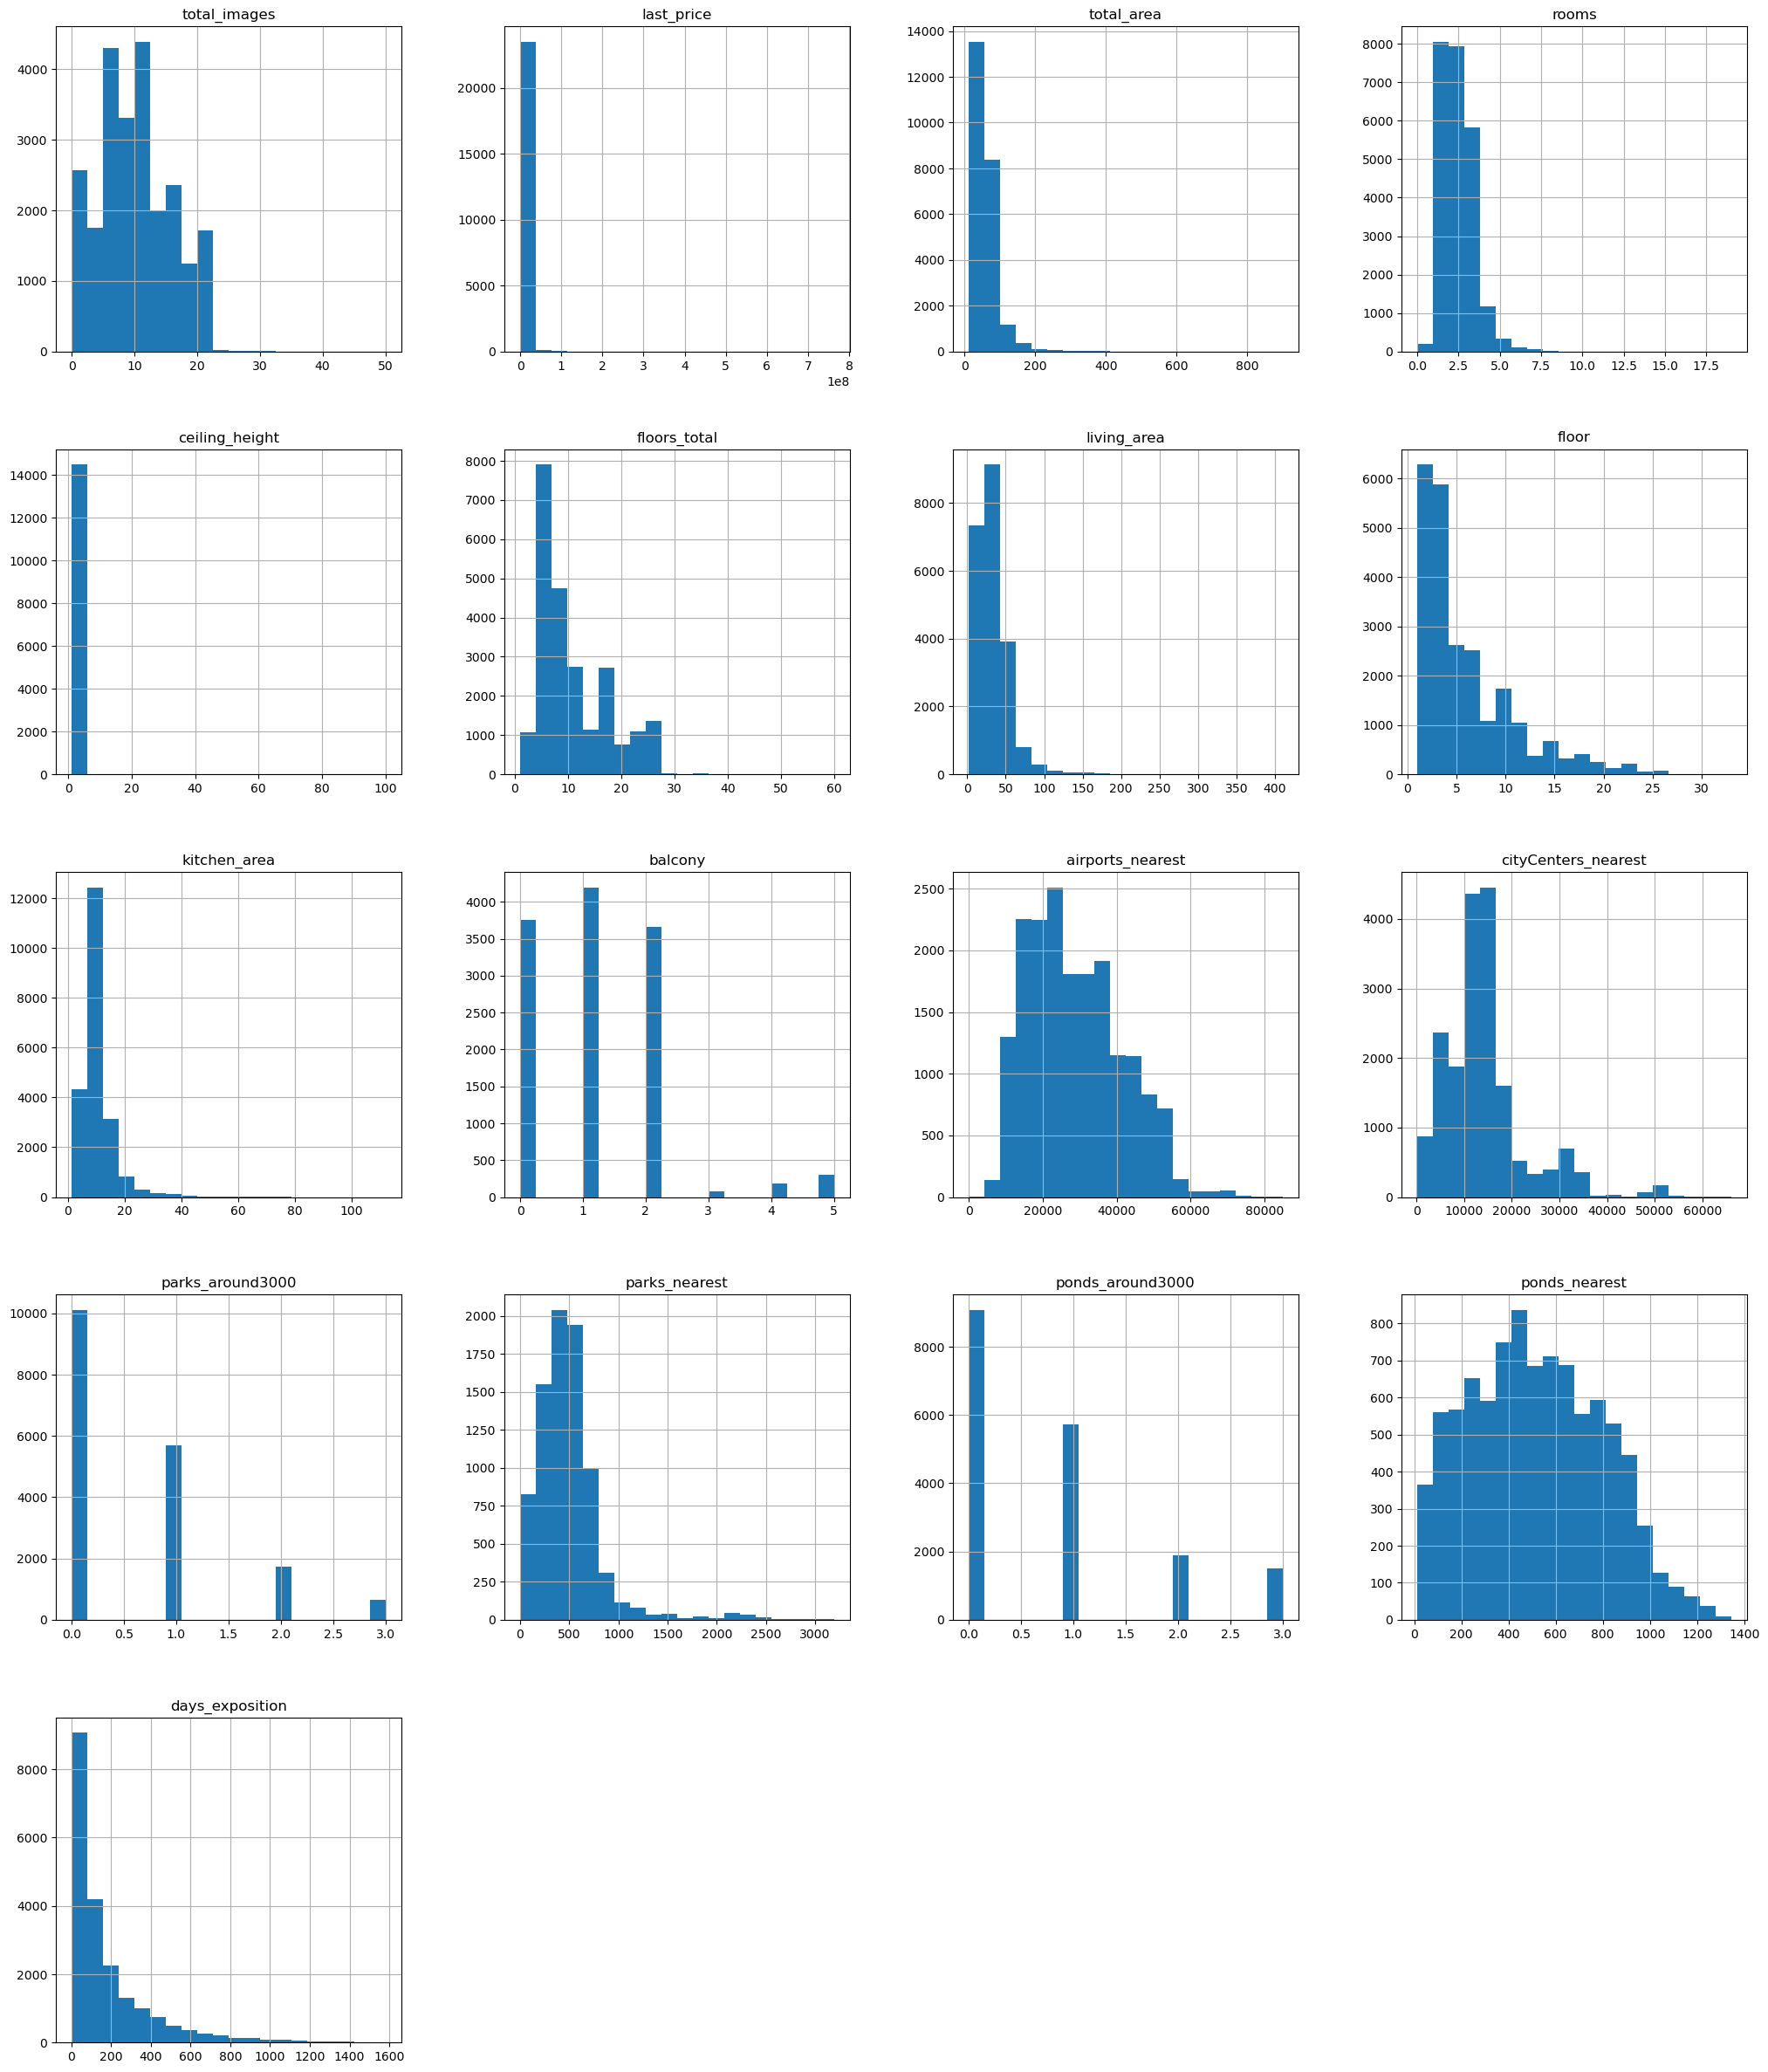

In [5]:
data.hist(bins = 20, figsize = (25,30));

*Сделаем выводы по следующим гистограммам:*

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
Расстояние имеет нормальное распределение, большая часть квартир находится на расстоянии от 10 до 40 км

balcony — число балконов
Основное количество квартир имеет 1, 2 или не имеет вообще балкона. Скорее всего квартиры с 4 и 5 балконами относятся к квартирам премиум класса. **необходимо оценить и при необходимости заполнить пустые данные** 

ceiling_height — высота потолков (м)
На данной гистограмме отображение не информативное, необходимо дополнительно изчить для формирования правильных заключений. **необходимо оценить и при необходимости заполнить пустые данные** 

cityCenters_nearest — расстояние до центра города (м)
основная часть квартир распологается на растоянии 20 км от центра, малая часть квартир <5км, скорее всего относятся к премиум классу. 18к имеет данные, т.е. 5к строчек пустые. **Необходимо оценить данные квартиры, примерно, где они могут находиться, а сделать это можно по расстоянию от аэропорта,т.к. аэропорт 1 в городе.**

days_exposition — сколько дней было размещено объявление (от публикации до снятия)
Большая часть объявлений висит <200 Дней.**необходимо оценить и при необходимости заполнить пустые данные** 


first_day_exposition — дата публикации
имеются все данные, **необходимо привести к читаемому формату даты**

floor — этаж
все окей 

floors_total — всего этажей в доме
**оценить пропуски**

is_apartment — апартаменты (булев тип)
все окей

kitchen_area — площадь кухни в квадратных метрах (м²)
**оценить пропуски** 

last_price — цена на момент снятия с публикации
**Гистограмма не информативна, необходимо изучить** 

living_area — жилая площадь в квадратных метрах (м²)
**оценить пропуски** 

parks_around3000 — число парков в радиусе 3 км
**оценить пропуски** 

parks_nearest — расстояние до ближайшего парка (м)
Скорее всего пропуски в данном окне соотносятся с количеством парков рядом. **оценить пропуски** 

ponds_around3000 — число водоёмов в радиусе 3 км
**оценить пропуски**

ponds_nearest — расстояние до ближайшего водоёма (м)
Скорее всего пропуски в данном окне соотносятся с количеством прудов рядом. **оценить пропуски** 

rooms — число комнат
наблюдаются аномалии


total_area — общая площадь квартиры в квадратных метрах (м²)
все ок

total_images — число фотографий квартиры в объявлении
все ок

После анализа делаем следущий вывод. 
Основными показателями на которые можно ориентироваться при анализе:
total_area , last_price , rooms , floor , cityCenters_nearest 
Необходимо: 
1. Проверить качество вышеуказанных показателей
2. Проверить комментарии выше.

### Выполните предобработку данных

Осуществим обработку пропусков: 

####  Обработка пропусков в поле ceiling_height 

Оценим разброс квартир в которых отсутствуют данные по потолкам и возможно ли их заполнение.

In [6]:
len(data.loc[data['ceiling_height'].isna()])

9195

Первоначально была идея заполнить пропуски медианными данными, т.к. уровень значение высоты потолка не должно значительно влиять на покупку квартиры.
Было изучено, что количества пустых ячеек более 9к и поэтому невозможно заполнить данные поля медианными значениями, т.к. статистика может сильно исказаиться. Нобходимо оставить данные поля пустыми. 
Изучим возможные выбросы, т.е. недействительные значения: 

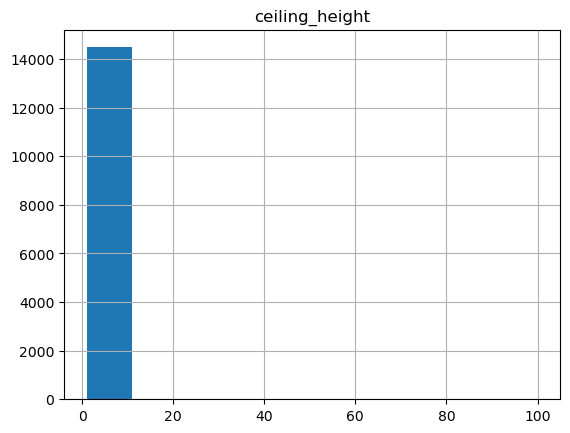

In [7]:
data.hist('ceiling_height');

(0.0, 10.0)

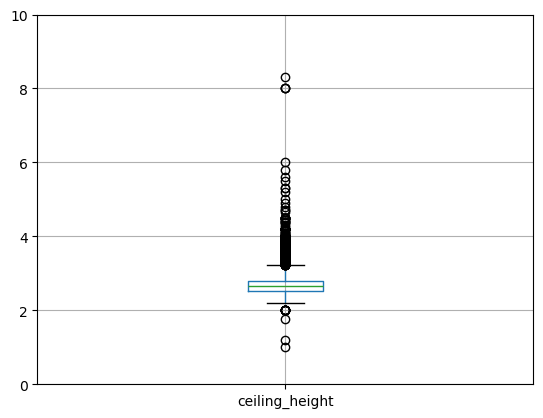

In [8]:
import matplotlib.pyplot as plt
data.boxplot('ceiling_height')
plt.ylim(0,10)

In [9]:
len(data.loc[(4< data['ceiling_height']) | (data['ceiling_height'] < 2)])

78

На гистограмме и диаграмме размаха видно, что данные значения являются выбросом и для их доля достаточно мала общего кол-ва, поэтому принято решение данные выбросы заменить на медианные значения. после чего построим гистограмму распределения.

<Axes: >

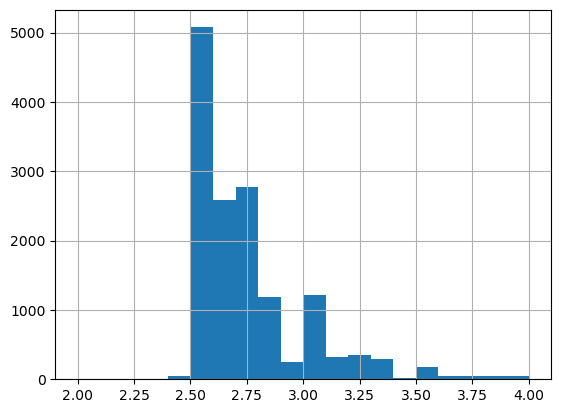

In [10]:
data.loc[(4 < data['ceiling_height']) | (data['ceiling_height'] < 2), 'ceiling_height'] = data['ceiling_height'].median()
data['ceiling_height'].hist(bins = 20)

Теперь распределение имеет вид - распределение Пуассона 

####  Изменение типа поля first_day_exposition

текущая ситуация, данное поле имеет тип object. Для корректной работы и в дальнейшем компилирования данных необходимо изменить формат на дату, кроме того оставим минимально день (часы, минуты, секунды уберем), т.к. нас интересует только день когда было размещено объявление. 



In [11]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0  2019-03-07T00:00:00      3   
1             7   3350000.0        40.4  2018-12-04T00:00:00      1   
2            10   5196000.0        56.0  2015-08-20T00:00:00      2   
3             0  64900000.0       159.0  2015-07-24T00:00:00      3   
4             2  10000000.0       100.0  2018-06-19T00:00:00      2   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70          16.0         51.0      8          NaN  ...   
1             NaN          11.0         18.6      1          NaN  ...   
2             NaN           5.0         34.3      4          NaN  ...   
3             NaN          14.0          NaN      9          NaN  ...   
4            3.03          14.0         32.0     13          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   
1          11.0      2.0   посёлок Шушары           12817.0   
2           8.3      0.0  Санкт-Петербург           21741.0   
3           NaN      0.0  Санкт-Петербург           28098.0   
4          41.0      NaN  Санкт-Петербург           31856.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   
1             18603.0               0.0            NaN               0.0   
2             13933.0               1.0           90.0               2.0   
3              6800.0               2.0           84.0               3.0   
4              8098.0               2.0          112.0               1.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3          234.0            424.0  
4           48.0            121.0  

[5 rows x 22 columns]

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
display (data.head(1))

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0             2.7          16.0         51.0      8          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0      NaN  Санкт-Петербург           18863.0   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0               1.0          482.0               2.0   

   ponds_nearest  days_exposition  
0          755.0              NaN  

[1 rows x 22 columns]

Дата приведена в соответствие.

#### Оценка пропусков locality_name

пропуске в поле locality_name не заполнишь, т.к. они являются качественными значениями. 

Проверим на явнные дубликаты

In [13]:
data['locality_name'].duplicated().sum()

23334

Проведем неявную проверку

In [14]:
list(data['locality_name'].sort_values(ascending=False).unique())

['село Шум',
 'село Старая Ладога',
 'село Русско-Высоцкое',
 'село Рождествено',
 'село Путилово',
 'село Паша',
 'село Павлово',
 'село Никольское',
 'село Копорье',
 'садовое товарищество Садко',
 'садовое товарищество Рахья',
 'садовое товарищество Приладожский',
 'садовое товарищество Новая Ропша',
 'садоводческое некоммерческое товарищество Лесная Поляна',
 'посёлок станции Свирь',
 'посёлок станции Громово',
 'посёлок при железнодорожной станции Приветнинское',
 'посёлок при железнодорожной станции Вещево',
 'посёлок городского типа имени Свердлова',
 'посёлок городского типа имени Морозова',
 'посёлок городского типа Форносово',
 'посёлок городского типа Ульяновка',
 'посёлок городского типа Токсово',
 'посёлок городского типа Тайцы',
 'посёлок городского типа Сиверский',
 'посёлок городского типа Рябово',
 'посёлок городского типа Рощино',
 'посёлок городского типа Павлово',
 'посёлок городского типа Мга',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Кузьмолов

In [15]:
data['locality_name'] = (
    data['locality_name']
    .str.lower()
    .str.replace('ё', 'е')
    .replace(['деревня ', 'поселок при железнодорожной станции ', 'поселок станции ','станции ', 'коттеджный поселок ','городской поселок ', 'садоводческое некоммерческое товарищество ' ,'садовое товарищество ', 'поселок городского типа ', 'поселок ', 'село ', 'садовое товарищество '], '', regex=True)
) 

In [16]:
display (list(data['locality_name'].sort_values(ascending=False).unique()))
display (len(data['locality_name'].sort_values(ascending=False).unique()))

['янино-1',
 'ям-тесово',
 'яльгелево',
 'ялгино',
 'юкки',
 'щеглово',
 'шушары',
 'шум',
 'шугозеро',
 'шпаньково',
 'шлиссельбург',
 'чудской бор',
 'цвылево',
 'цвелодубово',
 'хязельки',
 'хапо-ое',
 'форт красная горка',
 'форносово',
 'федоровское',
 'фалилеево',
 'ушаки',
 'усть-луга',
 'усть-ижора',
 'ульяновка',
 'углово',
 'трубников бор',
 'тосно',
 'торфяное',
 'торошковичи',
 'торосово',
 'торковичи',
 'токсово',
 'тойворово',
 'тихковицы',
 'тихвин',
 'тесово-4',
 'терпилицы',
 'терволово',
 'тельмана',
 'тарасово',
 'тайцы',
 'сясьстрой',
 'сяськелево',
 'счастье',
 'суходолье',
 'суоранда',
 'сумино',
 'суйда',
 'стрельна',
 'стеклянный',
 'старые бегуницы',
 'старосиверская',
 'старополье',
 'старое хинколово',
 'старая пустошь',
 'старая малукса',
 'старая ладога',
 'старая',
 'сосновый бор',
 'сосново',
 'совхозный',
 'советский',
 'снегиревка',
 'сланцы',
 'синявино',
 'сижно',
 'сиверский',
 'сестрорецк',
 'сертолово',
 'серебрянский',
 'семрино',
 'семиозерье',
 

306

Изучили уникальные значения в столбце с названиями и устранили неявные дубликаты.

Т.к. невозможно определить к какой группе относятся другие объекты, назовем их "другие"

In [17]:
data['locality_name'] = data['locality_name'].fillna('другие')

####  Оценка пропусков floors_total

In [18]:
len(data.loc[data['floors_total'].isna()])

86

Пропусков не так много (относительно общего потока данных). распределение на гистограмме выглядит более реальным, т.е. если заменить данные на медианные значения, то статистика не будет искажена.

Но заполним не простым медианным значением, а медианным значением по населенному пункту, скорее всего есть прямая связь. Проверим

In [19]:
data.pivot_table( index = 'locality_name', values = 'floors_total', aggfunc = ['median','count','mean']).round(0)

median        count         mean
                floors_total floors_total floors_total
locality_name                                         
агалатово                4.0            4          4.0
александровская         10.0            2         10.0
алексеевка               2.0            1          2.0
аннино                   5.0           16          5.0
аро                      4.0            3          4.0
...                      ...          ...          ...
юкки                     3.0            5          3.0
ялгино                   2.0            1          2.0
яльгелево                4.0            6          4.0
ям-тесово                5.0            2          5.0
янино-1                 12.0           68         10.0

[306 rows x 3 columns]

Получаем действительное разбиение по этажности в зависимоси от жилового. Заполним пропуски

In [20]:
for i in data['locality_name'].unique():
    data.loc[(data['locality_name'] == i) & (data['floors_total'].isna()), 'floors_total'] = data.loc[data['locality_name'] == i, 'floors_total'].median()

In [21]:
len (data.loc[data['floors_total'].isna()])

0

Убедились в том, что пропусков больше нет. НО т.к. медиана могла подкинуться как не целое число мы округлим значения и переведем с float в int.

In [22]:
data['floors_total'] = data['floors_total'].round().astype(int)

####  Оценка пропусков living_area

В данном параметре есть пропуски, необходимо понять их природу, возможно заменить значениями. 
Тип данных с float менять не следует, т.к. площать может быть не целым значением. Судя по гистограмме, квартиры имеют реальные значения по площади квартир, поэтому их заменять не будем. 

Построим заполенение циклом как в предыдущем задании и заполним пропуски в соответсвии с  количеством комнат в квартире, а т.к. там с данными все ок, то будем считать что данный анализ приближен к правде. 

In [23]:
for i in  data['rooms'].unique():
    data.loc[(data['rooms'] == i) & (data['living_area'].isna()) , 'living_area'] = data.loc[data['rooms'] == i , 'living_area'].median()

####  Оценка пропусков is_apartment

Количество пропусков слишком большое, а данных слишком мало чтобы строить предположения о наполнении. поэтому данные пропуски оставляем пропусками.

#### Оценка пропусков  studio и open_plan

Показатели пропусков не имеют, тип данных корректный. 

####  Оценка пропусков kitchen_area

In [24]:
display (data[data['kitchen_area'].isna()] ['studio'].value_counts())
display (data[data['kitchen_area'].isna()] ['open_plan'].value_counts())

studio
False    2129
True      149
Name: count, dtype: int64

open_plan
False    2211
True       67
Name: count, dtype: int64

Было предположение проверить, что площадь кухни не указана в студиях или в свободных планировках, т.к. в данном типе квартир кухня входит в комнату. После проведенного анализа можно сделать вывод, что параметры кухни напрямую никак не связаны с тем студия это или нет. *т.е. заполнить пропуски 0 нельзя!* 
Тип данных корректный. 

#### Обработка пропусков поля balcony

Данные отсутствуют в части квартир, скорее всего количество балконов = 0 в данных показателях, изза этого заполним пропуски 0. 
Кроме того поменяем после тип на int, т.к. количество балконов может быть только целым.

In [25]:
data['balcony'] = data['balcony'].fillna(0).astype('int')

#### обработка пропусков airports_nearest

Делаем предположение, что расстояние до аэропорта можно заполнить медианными/средними значениями в соответсвии с населенными пунктами. сформируем сводную таблицу и изучим показатели. 

In [26]:
data.pivot_table (index = 'locality_name', values = 'airports_nearest', aggfunc= ['median', 'mean'])

median             mean
                airports_nearest airports_nearest
locality_name                                    
александровская          12896.5     12896.500000
белоостров               57769.0     57769.000000
другие                   22041.0     24572.341463
зеленогорск              72282.0     73300.250000
колпино                  26232.0     26375.863501
красное село             25715.5     26595.579545
кронштадт                67850.0     67469.263158
левашово                 52693.0     52693.000000
лисий нос                55909.0     55302.333333
ломоносов                48415.5     48308.280303
металлострой             25758.0     25726.484848
молодежное               84665.0     84430.200000
мурино                   51553.0     51553.000000
павловск                 20529.5     21053.342105
парголово                53426.0     53994.926606
песочный                 54831.5     54565.500000
петергоф                 39231.0     40184.676617
петро-славянка           20605.0     20605.000000
понтонный                30642.0     30581.400000
пушкин                   15766.0     16447.869919
репино                   61797.5     62293.250000
санкт-петербург          26757.5     28046.186237
саперный                 34147.5     34142.666667
сестрорецк               56692.0     56640.486339
стрельна                 28317.0     28148.363636
усть-ижора               26510.5     26510.500000
шушары                   17427.0     16061.458716
щеглово                  61908.0     61908.000000

выбрав несколько рандомных населенных пунктов и проверив по яндекс картам данную гипотезу, убеждаемся что по населенным пунктам можно оценивать среднее расстояний до аэропорта
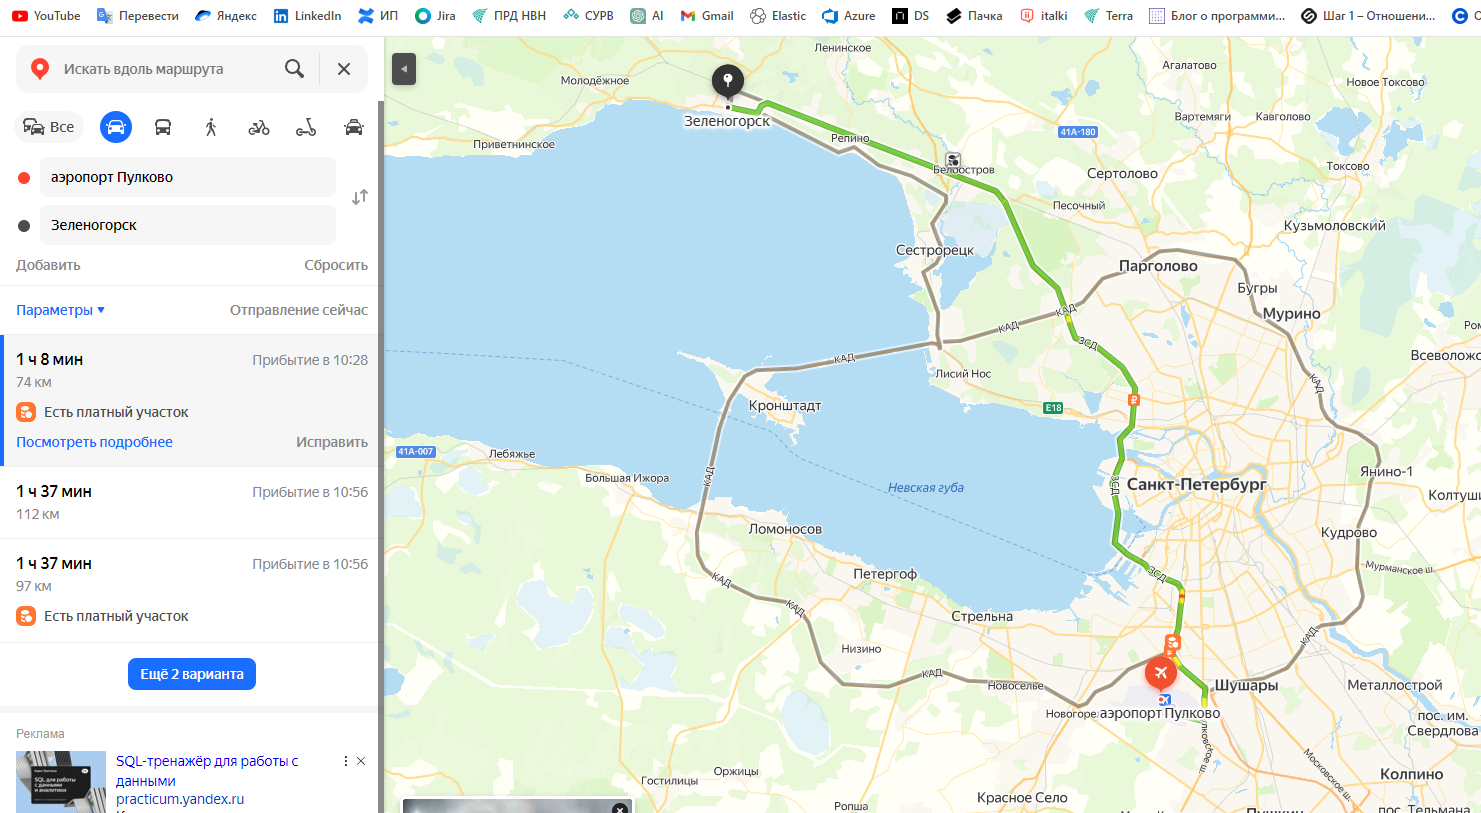
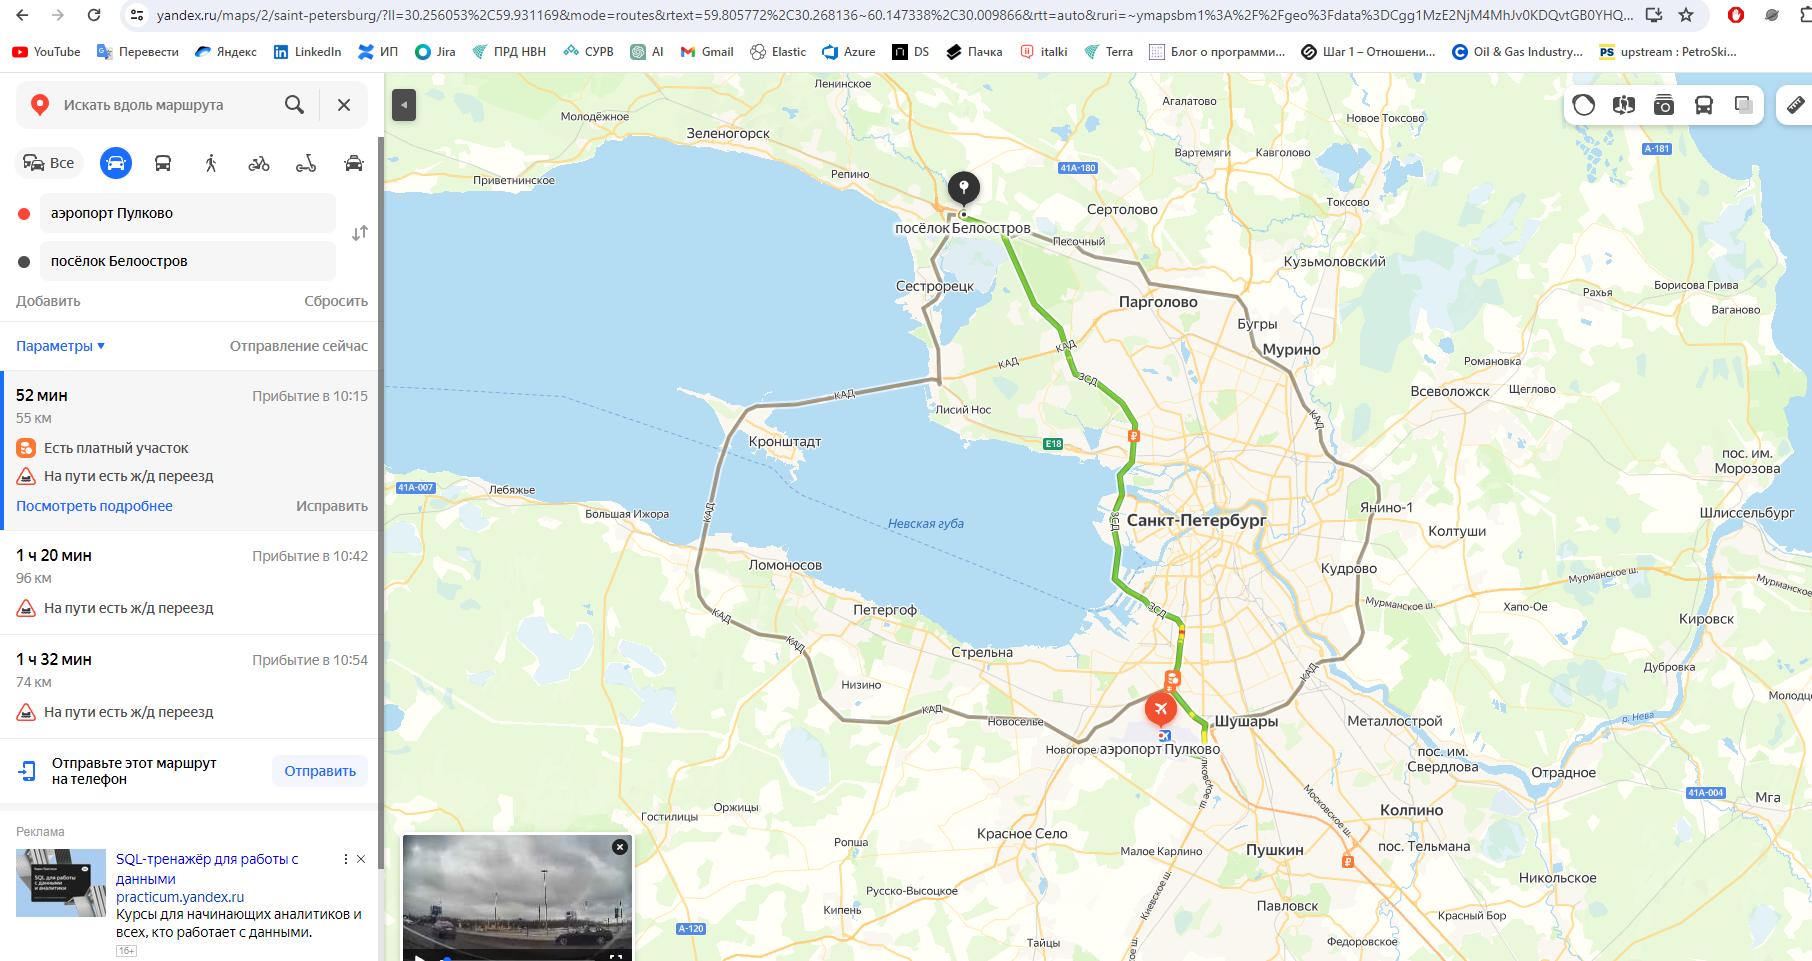
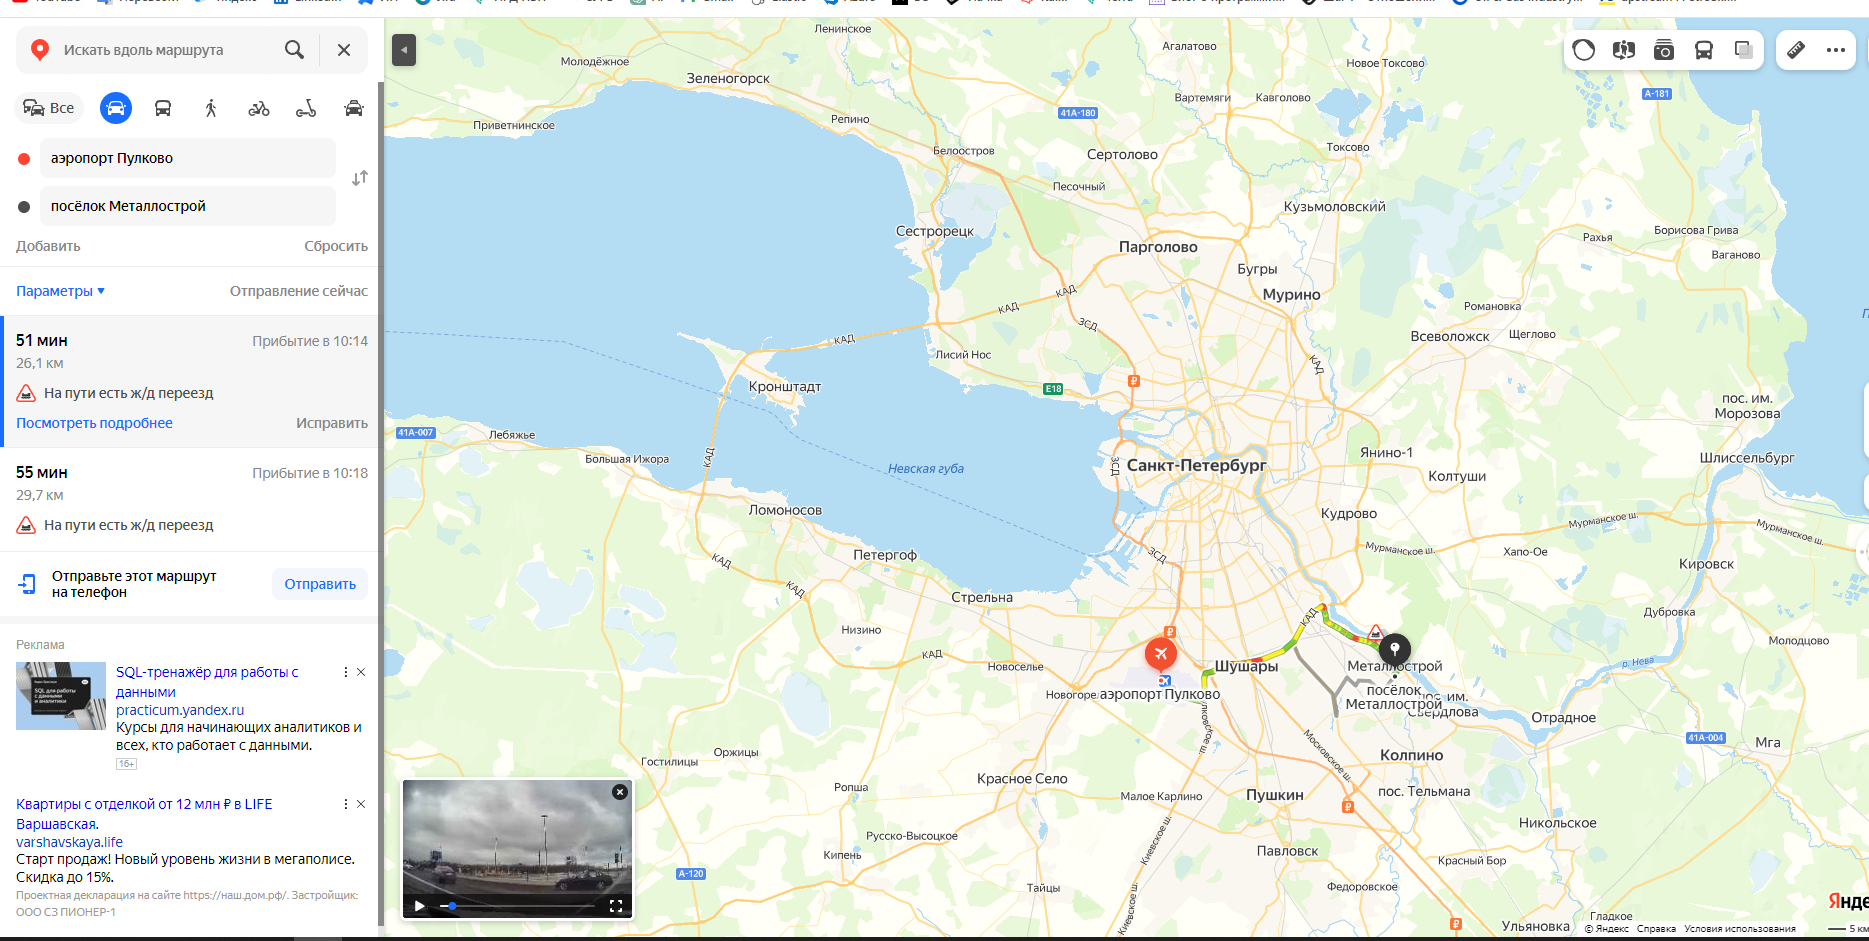
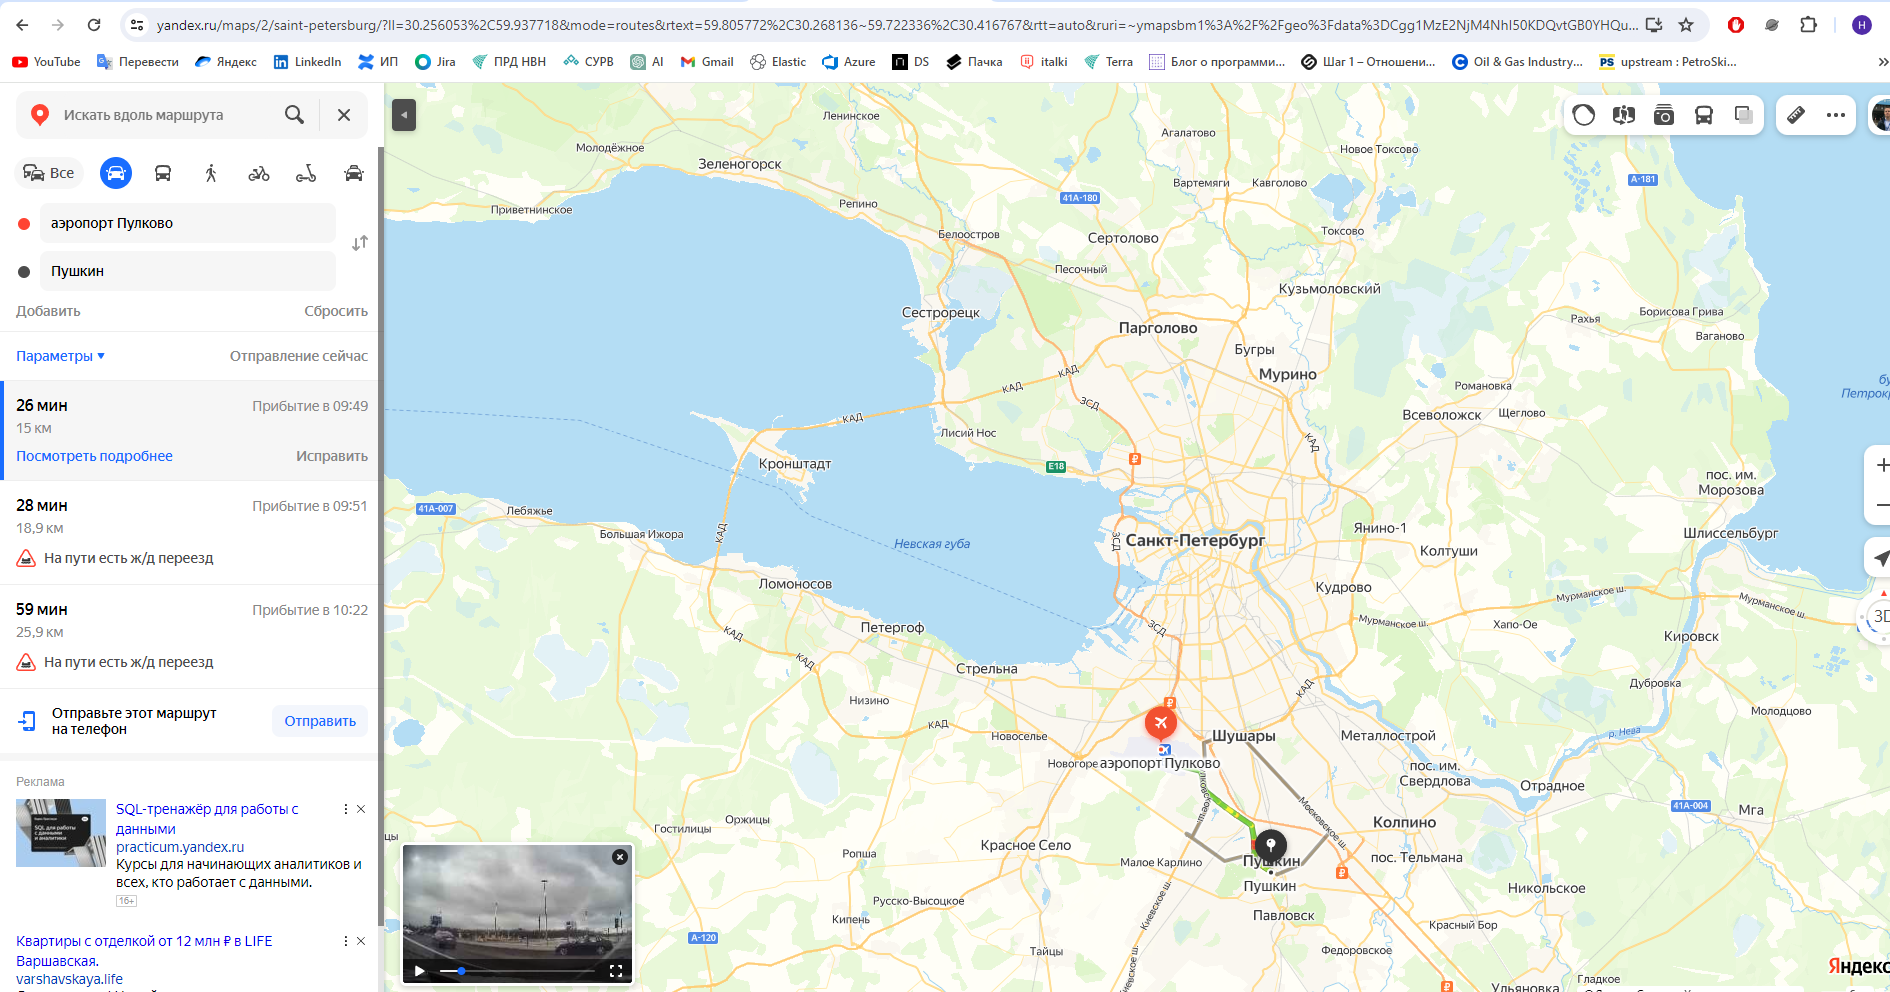

**наполним данные**

In [27]:
air1 = len(data.loc[~data['airports_nearest'].isna()])
for i in data['locality_name'].unique():
    if not data.loc[data['locality_name'] == i, 'airports_nearest'].isnull().all():
        data.loc[(data['locality_name'] == i) & (data['airports_nearest'].isna()), 'airports_nearest'] = data.loc[data['locality_name'] == i, 'airports_nearest'].median()
air2 =len(data.loc[~data['airports_nearest'].isna()])
display (air2 - air1)

713

По результату мы видим, что получилось заполнить пропуски в 713 показателях (это немного, но это честная работа). Остальные поля придется оставить пустыми.  

####  Обработка пропусков cityCenters_nearest

Невозможно обработать данный пропуск, т.к. не совсем понятно указанно растояние до центра. Т.е. это основной центр -СПБ. или центр локально каждого участка. Пропуски оставляем. Тип данных неизменен. 

####  Обработка пропусков parks_around3000 и ponds_around3000

В данном случае, скорее всего пропуски означают то, что парков и водоемов поблизости нет. => что пропуски заменим на нули и поменяем тип данных на int, т.к. 1,5 водоема не может быть. 

In [28]:
data['parks_around3000']=data['parks_around3000'].fillna(0).astype('int')
data['ponds_around3000']=data['ponds_around3000'].fillna(0).astype('int')

####  Обработка пропусков parks_nearest и ponds_nearest

In [29]:
display (data['parks_nearest'].describe())
display (data['ponds_nearest'].describe())

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Можно обратить внимание, что расстояние до парков определяются правильном типом данных и корреклирует с значениями parks_around3000 и ponds_around3000. 
Т.е. заполнить пропуски 0 невозможно, иначе будем думать что дома построены прямо в парке или пруду. поэтому оставляем как есть.

#### Обработка пропусков days_exposition

In [30]:
display (data['days_exposition'].describe())

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Пропуски в данном поле невозможно обогатить. Тип данных корректный. 

#### Обработка аномалий поля last_price

Изучим характер аномалии, на сколько значения выпадают из возможного результата и предложим новое решение. 

In [31]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

(0.0, 50000000.0)

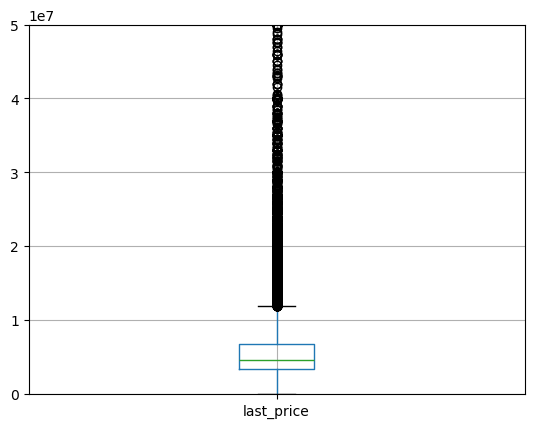

In [32]:
data.boxplot('last_price')
plt.ylim(0,50000000)

Согластно диаграмме размаха, все квартиры которые были проданы дороже чем 12 млн. являются аномалией. Посчитаем кол-во таких квартир:

In [33]:
len (data[data['last_price'] > 12000000])

1941

Довольно много, выкидывать из из расчета возможно будет не корректно, тем более гугл говорит о том что такие цены вполне возможны: 
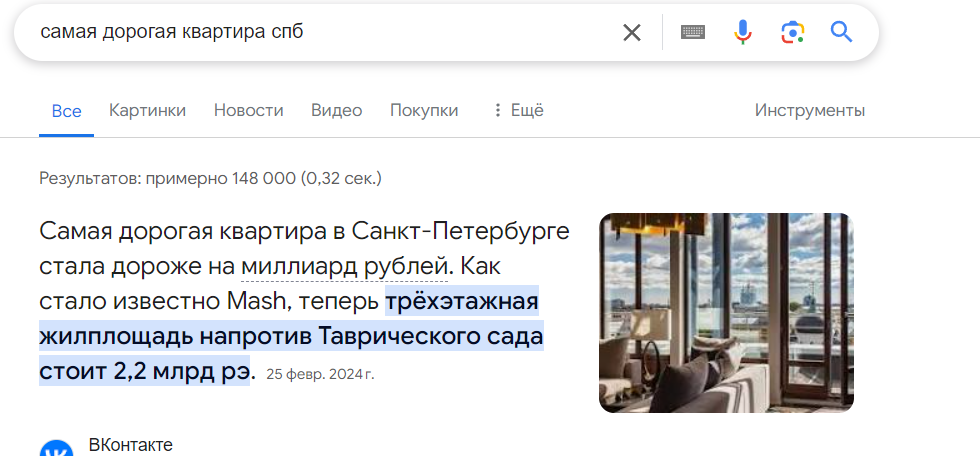
Кроме того не понятен характер ошибки,был ли это поставлен лишний 0 в цене или какая другая цифра. 
Сдедаем допущение, что в данной статистике мы будем рассматривать квартиры ценой до 30 млн.руб (т.е. 1.5% от исследуемых данных):

In [34]:
len (data[data['last_price'] > 30000000])

316

Т.к. результаты данных исследований не валидны, и цена является основным показателем, то избавимся от данных значений. 

In [35]:
data = data.drop(data[data['last_price'] > 30000000].index).reset_index(drop=True)

#### Обработка аномалий rooms

Изучим характер аномалии, на сколько значения выпадают из возможного результата и предложим новое решение.

In [36]:
data['rooms'].describe()

count    23383.000000
mean         2.040457
std          1.029206
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

<Axes: >

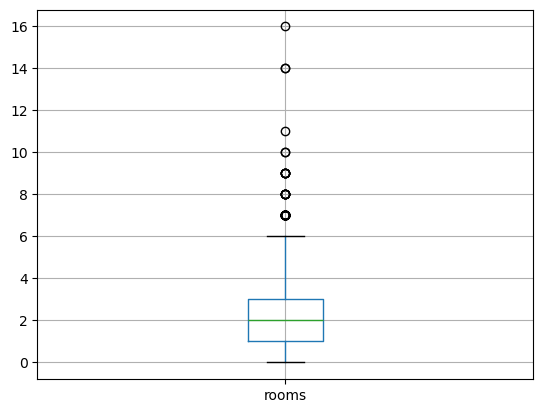

In [37]:
data.boxplot('rooms')

Посчитаем количество квартир >7 комнат. 

In [38]:
data.query ('rooms > 7')

total_images  last_price  total_area first_day_exposition  rooms  \
634               3  17500000.0       183.7           2018-07-01     11   
795               7  16500000.0       229.0           2016-02-25      8   
847               5  25000000.0       363.0           2017-12-23     14   
4090              6  23000000.0       272.6           2018-01-11     10   
4374             13  22190000.0       191.2           2017-12-05      8   
8637              5  16100000.0       150.0           2018-07-10      8   
8737             12  17000000.0       235.0           2018-07-14      9   
9421             10  23500000.0       313.0           2017-02-13      9   
11285             4  24000000.0       316.3           2015-03-25      8   
12281             8  19900000.0       210.3           2016-04-18      8   
12847             0  22250000.0       249.9           2019-04-23      9   
13219            14  19500000.0       309.7           2016-02-03      9   
16679            14  29000000.0       292.2           2017-01-12      9   
17867             4  15500000.0       216.1           2016-07-04     10   
18588             6  28500000.0       270.0           2015-03-02     16   
18683             4  15800000.0       236.4           2015-02-19      8   
20505             7  18000000.0       245.0           2017-04-06      8   
20508             0  24000000.0       250.0           2019-04-23      9   
20545             6  28659000.0       245.4           2016-03-31     14   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
634              3.40             7        138.8      7          NaN  ...   
795               NaN             6        160.0      5          NaN  ...   
847              3.16             5        222.0      4          NaN  ...   
4090             3.14             7        145.9      7          NaN  ...   
4374             2.90             6        115.8      1          NaN  ...   
8637             2.92             5        107.0      1          NaN  ...   
8737             3.00             6        179.2      3          NaN  ...   
9421             3.20             6        179.2      5          NaN  ...   
11285             NaN             5        187.0      5          NaN  ...   
12281            3.30             5        144.6      2          NaN  ...   
12847            3.20             5        157.0      5          NaN  ...   
13219             NaN             5        199.0      5          NaN  ...   
16679            3.35             5        225.9      4          NaN  ...   
17867            3.15             5        161.4      2          NaN  ...   
18588            3.00             4        180.0      4          NaN  ...   
18683             NaN             6        176.6      6          NaN  ...   
20505            3.54             5        155.0      2          NaN  ...   
20508            3.20             5        160.6      3          NaN  ...   
20545             NaN             4        168.3      2          NaN  ...   

       kitchen_area  balcony    locality_name  airports_nearest  \
634            13.3        0  санкт-петербург           23606.0   
795            25.0        0  санкт-петербург           23968.0   
847            16.6        0  санкт-петербург           38076.0   
4090           18.8        1  санкт-петербург           10726.0   
4374            5.0        0  санкт-петербург           21589.0   
8637            7.2        0  санкт-петербург           26080.0   
8737            NaN        0  санкт-петербург           24466.0   
9421           13.2        0  санкт-петербург           38435.0   
11285           NaN        0  санкт-петербург           24555.0   
12281          23.6        0  санкт-петербург           24770.0   
12847          12.4        0  санкт-петербург           10328.0   
13219          14.3        0  санкт-петербург           10328.0   
16679          32.9        1  санкт-петербург           24892.0   
17867          19.8        

После изчения данного среза, было принято решение, что удалить такие квартиры нельзя, т.к. скорее всего это не аномалии, по сл причинам: 
1. все квартиры расположены в СПБ, т.е. имение таких больших квартир к каком нибудь селе маловероятно, чего не сказать о столице
2. ценовая категория у всех квартир +- одна (довольно высокая), т.е. попасть они туда скорее всего просто так не могли. 
3. большая часть из них находится на небольшом удалении от центра города, т.е. скорее всего это старые объекты архитектуры, в которых такое кол-во квартир возможно
5. площадь квартиг говорит сама за себя. > 200м2

####  Результат подготовки данных: 

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             2  10000000.0       100.0           2018-06-19      2   
4            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70            16         51.0      8          NaN  ...   
1             NaN            11         18.6      1          NaN  ...   
2             NaN             5         34.3      4          NaN  ...   
3            3.03            14         32.0     13          NaN  ...   
4             NaN            12         14.4      5          NaN  ...   

   kitchen_area  balcony    locality_name  airports_nearest  \
0          25.0        0  санкт-петербург           18863.0   
1          11.0        2           шушары           12817.0   
2           8.3        0  санкт-петербург           21741.0   
3          41.0        0  санкт-петербург           31856.0   
4           9.1        0          янино-1               NaN   

  cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0             16028.0                 1          482.0                 2   
1             18603.0                 0            NaN                 0   
2             13933.0                 1           90.0                 2   
3              8098.0                 2          112.0                 1   
4                 NaN                 0            NaN                 0   

   ponds_nearest  days_exposition  
0          755.0              NaN  
1            NaN             81.0  
2          574.0            558.0  
3           48.0            121.0  
4            NaN             55.0  

[5 rows x 22 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23383 entries, 0 to 23382
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23383 non-null  int64         
 1   last_price            23383 non-null  float64       
 2   total_area            23383 non-null  float64       
 3   first_day_exposition  23383 non-null  datetime64[ns]
 4   rooms                 23383 non-null  int64         
 5   ceiling_height        14295 non-null  float64       
 6   floors_total          23383 non-null  int32         
 7   living_area           23383 non-null  float64       
 8   floor                 23383 non-null  int64         
 9   is_apartment          2740 non-null   object        
 10  studio                23383 non-null  bool          
 11  open_plan             23383 non-null  bool          
 12  kitchen_area          21139 non-null  float64       
 13  balcony         

None

array([[<Axes: title={'center': 'total_images'}>,
        <Axes: title={'center': 'last_price'}>,
        <Axes: title={'center': 'total_area'}>,
        <Axes: title={'center': 'first_day_exposition'}>],
       [<Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'ceiling_height'}>,
        <Axes: title={'center': 'floors_total'}>,
        <Axes: title={'center': 'living_area'}>],
       [<Axes: title={'center': 'floor'}>,
        <Axes: title={'center': 'kitchen_area'}>,
        <Axes: title={'center': 'balcony'}>,
        <Axes: title={'center': 'airports_nearest'}>],
       [<Axes: title={'center': 'cityCenters_nearest'}>,
        <Axes: title={'center': 'parks_around3000'}>,
        <Axes: title={'center': 'parks_nearest'}>,
        <Axes: title={'center': 'ponds_around3000'}>],
       [<Axes: title={'center': 'ponds_nearest'}>,
        <Axes: title={'center': 'days_exposition'}>, <Axes: >, <Axes: >]],
      dtype=object)

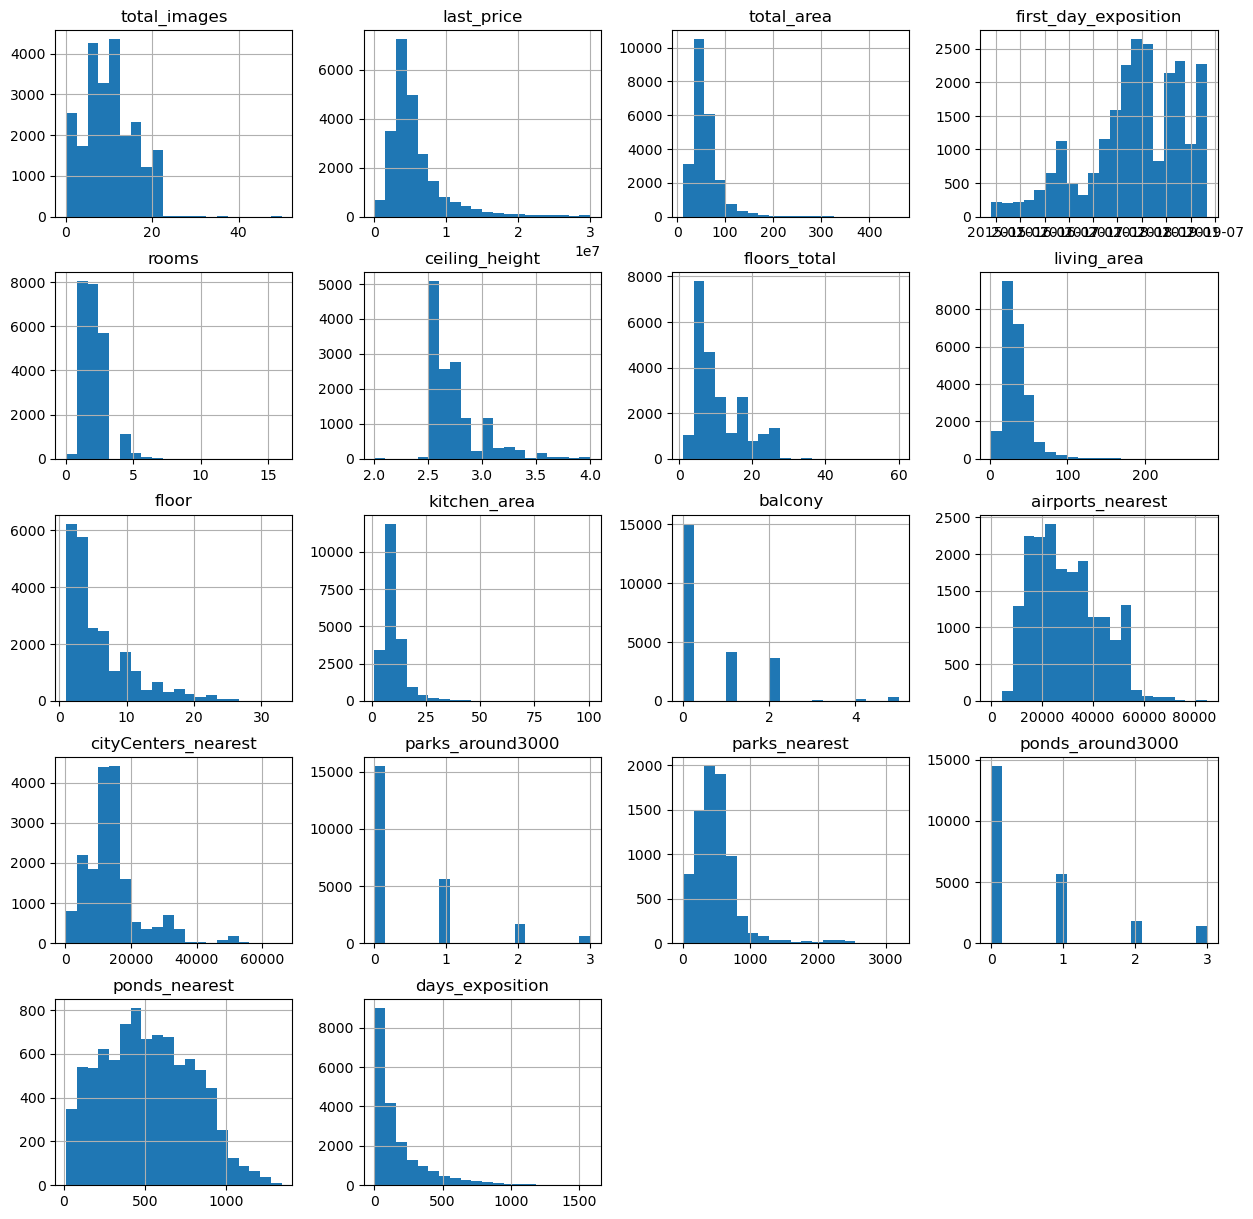

In [39]:
display (data.head())
display (data.info())
display (data.hist(bins = 20, figsize = (15, 15)))

***Было проведено следующее:*** 
 Файл с данными открыт.
 Файл с данными изучен: выведены первые строки, использован метод info(), построены гистограммы.
 Найдены пропущенные значения.
 Пропущенные значения заполнены там, где это возможно.
 Объяснено, какие пропущенные значения обнаружены.
 В каждом столбце установлен корректный тип данных.
 Объяснено, в каких столбцах изменён тип данных и почему.
 Устранены неявные дубликаты в названиях населённых пунктов.
 Обработаны редкие и выбивающиеся значения (аномалии).
 
 Далее, данные можно использовать для анализа.

### Добавьте в таблицу новые столбцы

#### Добавим цену одного квадратного метра

In [40]:
data['meter_price'] = (data ['last_price']/data['total_area']).round (2)

In [41]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             2  10000000.0       100.0           2018-06-19      2   
4            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70            16         51.0      8          NaN  ...   
1             NaN            11         18.6      1          NaN  ...   
2             NaN             5         34.3      4          NaN  ...   
3            3.03            14         32.0     13          NaN  ...   
4             NaN            12         14.4      5          NaN  ...   

   balcony    locality_name  airports_nearest  cityCenters_nearest  \
0        0  санкт-петербург           18863.0              16028.0   
1        2           шушары           12817.0              18603.0   
2        0  санкт-петербург           21741.0              13933.0   
3        0  санкт-петербург           31856.0               8098.0   
4        0          янино-1               NaN                  NaN   

  parks_around3000  parks_nearest  ponds_around3000  ponds_nearest  \
0                1          482.0                 2          755.0   
1                0            NaN                 0            NaN   
2                1           90.0                 2          574.0   
3                2          112.0                 1           48.0   
4                0            NaN                 0            NaN   

   days_exposition  meter_price  
0              NaN    120370.37  
1             81.0     82920.79  
2            558.0     92785.71  
3            121.0    100000.00  
4             55.0     95065.79  

[5 rows x 23 columns]

#### День недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

In [42]:
data ['weekday'] = data['first_day_exposition'].dt.weekday 

In [43]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             2  10000000.0       100.0           2018-06-19      2   
4            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70            16         51.0      8          NaN  ...   
1             NaN            11         18.6      1          NaN  ...   
2             NaN             5         34.3      4          NaN  ...   
3            3.03            14         32.0     13          NaN  ...   
4             NaN            12         14.4      5          NaN  ...   

     locality_name  airports_nearest  cityCenters_nearest  parks_around3000  \
0  санкт-петербург           18863.0              16028.0                 1   
1           шушары           12817.0              18603.0                 0   
2  санкт-петербург           21741.0              13933.0                 1   
3  санкт-петербург           31856.0               8098.0                 2   
4          янино-1               NaN                  NaN                 0   

  parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0         482.0                 2          755.0              NaN   
1           NaN                 0            NaN             81.0   
2          90.0                 2          574.0            558.0   
3         112.0                 1           48.0            121.0   
4           NaN                 0            NaN             55.0   

   meter_price  weekday  
0    120370.37        3  
1     82920.79        1  
2     92785.71        3  
3    100000.00        1  
4     95065.79        0  

[5 rows x 24 columns]

#### месяц публикации объявления;

In [44]:
data ['month'] = data['first_day_exposition'].dt.month

In [45]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             2  10000000.0       100.0           2018-06-19      2   
4            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70            16         51.0      8          NaN  ...   
1             NaN            11         18.6      1          NaN  ...   
2             NaN             5         34.3      4          NaN  ...   
3            3.03            14         32.0     13          NaN  ...   
4             NaN            12         14.4      5          NaN  ...   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0                 1          482.0   
1           12817.0              18603.0                 0            NaN   
2           21741.0              13933.0                 1           90.0   
3           31856.0               8098.0                 2          112.0   
4               NaN                  NaN                 0            NaN   

  ponds_around3000  ponds_nearest  days_exposition  meter_price  weekday  \
0                2          755.0              NaN    120370.37        3   
1                0            NaN             81.0     82920.79        1   
2                2          574.0            558.0     92785.71        3   
3                1           48.0            121.0    100000.00        1   
4                0            NaN             55.0     95065.79        0   

   month  
0      3  
1     12  
2      8  
3      6  
4      9  

[5 rows x 25 columns]

#### год публикации объявления;

In [46]:
data ['year'] = data['first_day_exposition'].dt.year

In [47]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             2  10000000.0       100.0           2018-06-19      2   
4            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70            16         51.0      8          NaN  ...   
1             NaN            11         18.6      1          NaN  ...   
2             NaN             5         34.3      4          NaN  ...   
3            3.03            14         32.0     13          NaN  ...   
4             NaN            12         14.4      5          NaN  ...   

   cityCenters_nearest  parks_around3000  parks_nearest  ponds_around3000  \
0              16028.0                 1          482.0                 2   
1              18603.0                 0            NaN                 0   
2              13933.0                 1           90.0                 2   
3               8098.0                 2          112.0                 1   
4                  NaN                 0            NaN                 0   

  ponds_nearest  days_exposition  meter_price  weekday  month  year  
0         755.0              NaN    120370.37        3      3  2019  
1           NaN             81.0     82920.79        1     12  2018  
2         574.0            558.0     92785.71        3      8  2015  
3          48.0            121.0    100000.00        1      6  2018  
4           NaN             55.0     95065.79        0      9  2018  

[5 rows x 26 columns]

#### тип этажа квартиры (значения — «первый», «последний», «другой»);

In [48]:
f = data ['floor'] == 1 
l = data ['floor'] == data ['floors_total']
o = (data ['floor'] != 1) & (data ['floor'] != data ['floors_total'])
data.loc [f, 'floor_type'] = 'первый'
data.loc [l, 'floor_type'] = 'последний'
data.loc [o, 'floor_type'] = 'другой'

In [49]:
data['floor_type'].value_counts()

floor_type
другой       17208
последний     3298
первый        2877
Name: count, dtype: int64

#### расстояние до центра города в километрах.

In [50]:
data ['lenth_to_center'] = (data ['cityCenters_nearest'] / 1000).round()

In [51]:
data.head()

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0       108.0           2019-03-07      3   
1             7   3350000.0        40.4           2018-12-04      1   
2            10   5196000.0        56.0           2015-08-20      2   
3             2  10000000.0       100.0           2018-06-19      2   
4            10   2890000.0        30.4           2018-09-10      1   

   ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0            2.70            16         51.0      8          NaN  ...   
1             NaN            11         18.6      1          NaN  ...   
2             NaN             5         34.3      4          NaN  ...   
3            3.03            14         32.0     13          NaN  ...   
4             NaN            12         14.4      5          NaN  ...   

   parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0          482.0                 2          755.0              NaN   
1            NaN                 0            NaN             81.0   
2           90.0                 2          574.0            558.0   
3          112.0                 1           48.0            121.0   
4            NaN                 0            NaN             55.0   

  meter_price  weekday  month  year  floor_type  lenth_to_center  
0   120370.37        3      3  2019      другой             16.0  
1    82920.79        1     12  2018      первый             19.0  
2    92785.71        3      8  2015      другой             14.0  
3   100000.00        1      6  2018      другой              8.0  
4    95065.79        0      9  2018      другой              NaN  

[5 rows x 28 columns]

### Проведите исследовательский анализ данных

Изучим следующий список параметров: 

    общая площадь;
    жилая площадь;
    площадь кухни;
    цена объекта;
    количество комнат;
    высота потолков;
    тип этажа квартиры («первый», «последний», «другой»);
    общее количество этажей в доме;
    расстояние до центра города в метрах;
    расстояние до ближайшего парка
    
Частично анализ был проведен в рамках главы 1, но в данной главе проведем дополнительный анализ. 

*Изучите перечисленные ниже параметры объектов и постройте отдельные гистограммы для каждого из этих параметров. В некоторых параметрах встречаются редкие и выбивающиеся значения. При построении гистограмм удалите их. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах, если они есть. Если природа аномалии понятна и данные действительно искажены, то восстановите    корректное значение. В противном случае удалите редкие и выбивающиеся значения.*

#### Обработка данных, поиск аномалий 

##### Изучим общую, кухонную и жилую площадь совместно;

первоначально посмотрим имеются ли такие поля где жилая площадь больше общей

In [52]:
display (data[ data ['total_area'] < data ['living_area']] [['total_area', 'living_area', 'kitchen_area']])
indx= data[ data ['total_area'] < data ['living_area']].index

total_area  living_area  kitchen_area
1567         62.4       63.600           NaN
3320         41.5       45.000           NaN
8852         41.2       45.000           NaN
9663         42.0       45.000           NaN
9831         49.5       63.600           NaN
11655        42.0       45.000           NaN
11816        62.0       63.600           NaN
11878        15.0       17.600           NaN
11966        30.0       30.500           NaN
12023        71.4       91.785           NaN
12659        67.0       91.785           NaN
12834        62.0       63.600           NaN
12862        42.0       63.600           NaN
14407       100.6      145.000           NaN
14452       106.0      123.900           NaN
14642        42.0       45.000           NaN
16441        61.8       63.600           NaN
16712        15.0       17.600           NaN
16842        50.0       63.600           NaN
17227        50.0       63.600           NaN
17710        13.0       17.600           NaN
18195        42.0       45.000           5.0
18297        42.0       45.000           NaN
18397        59.0       63.600           NaN
19276        13.0       17.600           NaN
19288        13.2       17.600           NaN
19827        42.0       63.600           NaN
22007        41.0       45.000           NaN
22056        17.2       17.600           NaN

Изучив данную выборку скорее всего люди при занесении информации перепутали местами жилую и общую площадь

In [53]:
total_living_area = data ['total_area'] < data ['living_area']
data.loc [total_living_area , 'kitchen_area'] =  data ['living_area'] - data ['total_area']
data.loc [total_living_area , 'total_area'] =  data ['living_area']
data.loc [total_living_area , 'living_area'] =  data ['total_area'] - data ['kitchen_area']
display (data.loc[indx][['total_area', 'living_area', 'kitchen_area']])
(data ['total_area'] < data ['living_area']).sum()

total_area  living_area  kitchen_area
1567       63.600         62.4         1.200
3320       45.000         41.5         3.500
8852       45.000         41.2         3.800
9663       45.000         42.0         3.000
9831       63.600         49.5        14.100
11655      45.000         42.0         3.000
11816      63.600         62.0         1.600
11878      17.600         15.0         2.600
11966      30.500         30.0         0.500
12023      91.785         71.4        20.385
12659      91.785         67.0        24.785
12834      63.600         62.0         1.600
12862      63.600         42.0        21.600
14407     145.000        100.6        44.400
14452     123.900        106.0        17.900
14642      45.000         42.0         3.000
16441      63.600         61.8         1.800
16712      17.600         15.0         2.600
16842      63.600         50.0        13.600
17227      63.600         50.0        13.600
17710      17.600         13.0         4.600
18195      45.000         42.0         3.000
18297      45.000         42.0         3.000
18397      63.600         59.0         4.600
19276      17.600         13.0         4.600
19288      17.600         13.2         4.400
19827      63.600         42.0        21.600
22007      45.000         41.0         4.000
22056      17.600         17.2         0.400

0

Вся общая площадь больше или равна жилой

Изучим распределение по данным. 

<Axes: >

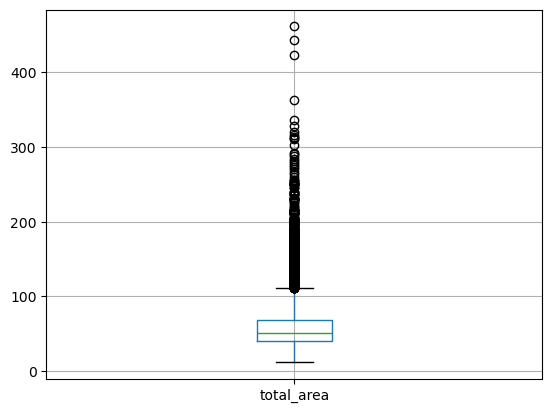

In [54]:
data.boxplot('total_area')

<Axes: >

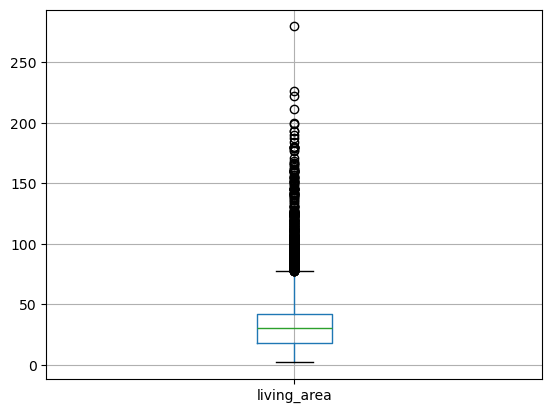

In [55]:
data.boxplot('living_area')

После изчения данных видно, что имеются аномалии согласно данным диаграммам. Посчитаем их кол-во

In [56]:
len(data.query('(total_area > 110) and (living_area >80 )'))

511

Имею следующее мнение, что все вполне реально допустимые значения квартир до 150 м2. т.е. существование кваритры 100м2 очень даже вероятно, поэтому избаляться от данных показателей нельзя. 
Сформируем новый датафрейм по которому построим график

In [57]:
data = data.drop(data[data['total_area'] > 150].index).reset_index(drop=True)
data

total_images  last_price  total_area first_day_exposition  rooms  \
0                20  13000000.0      108.00           2019-03-07      3   
1                 7   3350000.0       40.40           2018-12-04      1   
2                10   5196000.0       56.00           2015-08-20      2   
3                 2  10000000.0      100.00           2018-06-19      2   
4                10   2890000.0       30.40           2018-09-10      1   
...             ...         ...         ...                  ...    ...   
23030             9   9700000.0      133.81           2017-03-21      3   
23031            14   3100000.0       59.00           2018-01-15      3   
23032            18   2500000.0       56.70           2018-02-11      2   
23033            13  11475000.0       76.75           2017-03-28      2   
23034             4   1350000.0       32.30           2017-07-21      1   

       ceiling_height  floors_total  living_area  floor is_apartment  ...  \
0                2.70            16         51.0      8          NaN  ...   
1                 NaN            11         18.6      1          NaN  ...   
2                 NaN             5         34.3      4          NaN  ...   
3                3.03            14         32.0     13          NaN  ...   
4                 NaN            12         14.4      5          NaN  ...   
...               ...           ...          ...    ...          ...  ...   
23030            3.70             5         73.3      3          NaN  ...   
23031             NaN             5         38.0      4          NaN  ...   
23032             NaN             3         29.7      1          NaN  ...   
23033            3.00            17         30.5     12          NaN  ...   
23034            2.50             5         12.3      1          NaN  ...   

       parks_nearest  ponds_around3000  ponds_nearest  days_exposition  \
0              482.0                 2          755.0              NaN   
1                NaN                 0            NaN             81.0   
2               90.0                 2          574.0            558.0   
3              112.0                 1           48.0            121.0   
4                NaN                 0            NaN             55.0   
...              ...               ...            ...              ...   
23030          796.0                 3          381.0              NaN   
23031            NaN                 0            NaN             45.0   
23032            NaN                 0            NaN              NaN   
23033          173.0                 3          196.0            602.0   
23034            NaN                 0            NaN              NaN   

      meter_price  weekday  month  year  floor_type  lenth_to_center  
0       120370.37        3      3  2019      другой             16.0  
1        82920.79        1     12  2018      первый             19.0  
2        92785.71        3      8  2015      другой             14.0  
3       100000.00        1      6  2018      другой              8.0  
4        95065.79        0      9  2018      другой              NaN  
...           ...      ...    ...   ...         ...              ...  
23030    72490.85        1      3  2017      другой              4.0  
23031    52542.37        0      1  2018      другой              NaN  
23032    44091.71        6      2  2018      первый              NaN  
23033   149511.40        1      3  2017      другой             10.0  
23034    41795.67        4      7  2017      первый              NaN  

[23035 rows x 28 columns]

<Axes: xlabel='total_area'>

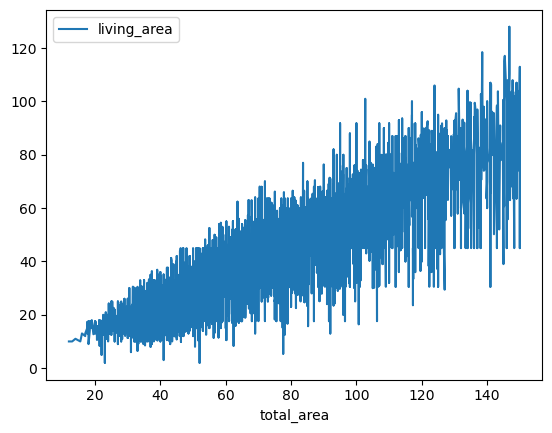

In [58]:
data.sort_values (by = 'total_area').plot(x = 'total_area', y = 'living_area')

Изучим кухонную площадь

count    20857.000000
mean        10.147539
std          4.812965
min          0.400000
25%          7.000000
50%          9.000000
75%         11.600000
max         64.000000
Name: kitchen_area, dtype: float64

<Axes: >

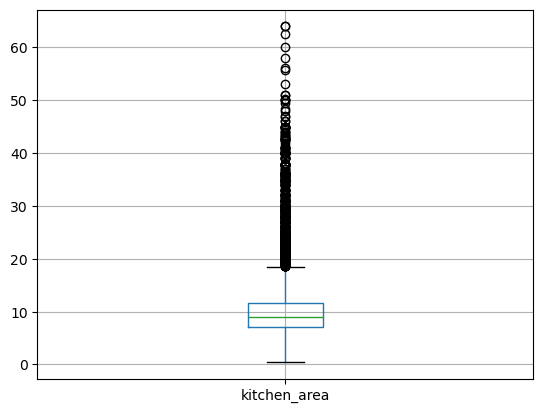

In [59]:
display (data['kitchen_area'].describe())
data.boxplot('kitchen_area')

Из данного распределения будем считать что данные по кухням были внесены ошибочно. и в больших квартирах, 

<Axes: >

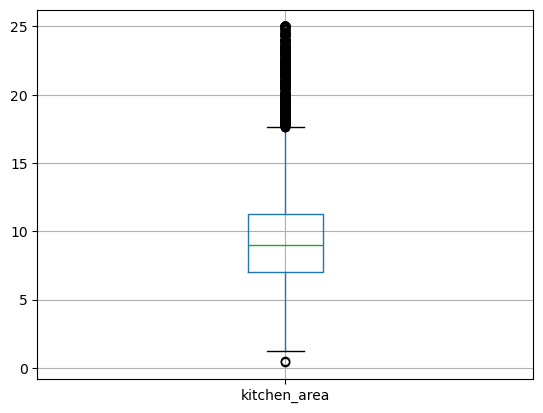

In [60]:
wrong_kitchen = data['kitchen_area'] > 25
data.loc[wrong_kitchen ,'kitchen_area'] = data.loc[wrong_kitchen ,'kitchen_area']/10
data.boxplot('kitchen_area')

Выбросы устранены, перейдем к изучению данных: 

0.9052436125653405

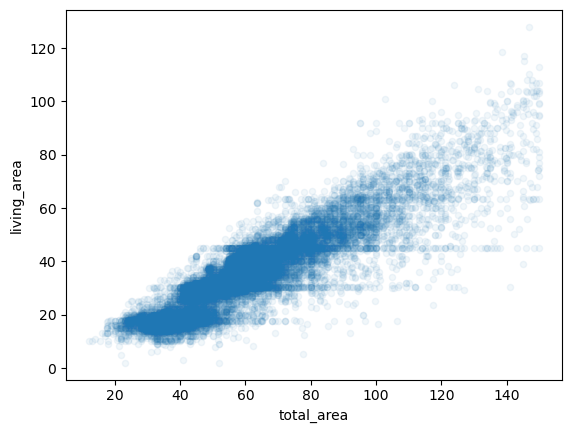

In [61]:
data.sort_values(by = 'total_area').plot (x = 'total_area', y = 'living_area', kind='scatter', alpha=0.06)
display (data['total_area'].corr(data['living_area']))

0.42521530693148946

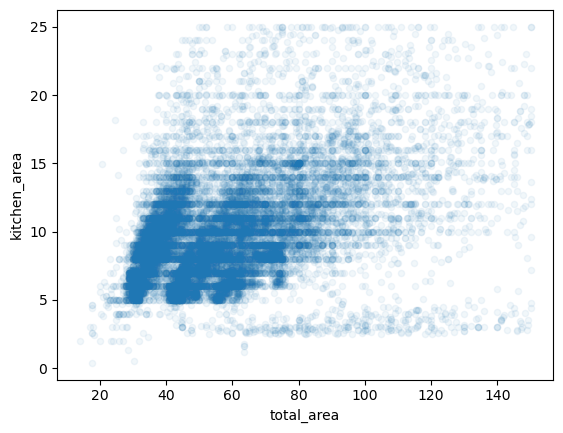

In [62]:
data.sort_values(by = 'total_area').plot (x = 'total_area', y = 'kitchen_area', kind='scatter', alpha=0.06)
display (data['total_area'].corr(data['kitchen_area']))

**Вывод анализа площадей:**

1. проведен анализ и отброшена аномальная информация.
2. с увеличение общей площади увеличивается и жилая площадь и кухонная площадь. 
3. основной квартирный сегмент распологается до 100м2 и с кухнями до 15м2 (основной блок для анализа)

##### цена объекта и кол-во квартир

Данные обработаны и подготовлены в пунктах 2.15 2.16. Перейдем к изучению

Проверим основные показатели которые могут оказывать влияние на цену квартиры:

In [63]:
numeric_data = data.select_dtypes(include='number')
numeric_data.corr()

total_images  last_price  total_area     rooms  \
total_images             1.000000    0.166899    0.123798  0.095979   
last_price               0.166899    1.000000    0.758297  0.459313   
total_area               0.123798    0.758297    1.000000  0.793246   
rooms                    0.095979    0.459313    0.793246  1.000000   
ceiling_height           0.032635    0.500891    0.436057  0.200340   
floors_total             0.015747    0.096117   -0.039920 -0.223271   
living_area              0.107859    0.610439    0.905244  0.886028   
floor                    0.033083    0.083114   -0.026098 -0.162909   
kitchen_area             0.052466    0.424516    0.425215  0.098087   
balcony                  0.050169    0.043580    0.045385 -0.002106   
airports_nearest        -0.014434   -0.074618   -0.055616 -0.085695   
cityCenters_nearest     -0.041860   -0.350326   -0.214395 -0.137262   
parks_around3000         0.028418    0.282395    0.158193  0.108867   
parks_nearest           -0.005756    0.055028    0.018599 -0.038178   
ponds_around3000         0.004864    0.297130    0.173836  0.079830   
ponds_nearest            0.001453   -0.095894   -0.061527 -0.024517   
days_exposition         -0.030509    0.120608    0.150946  0.107504   
meter_price              0.138287    0.702376    0.141453 -0.085444   
weekday                 -0.008887   -0.017661   -0.011978 -0.001687   
month                    0.005118    0.001467    0.007264 -0.002903   
year                     0.145448   -0.023446   -0.073419 -0.043002   
lenth_to_center         -0.041370   -0.351048   -0.214718 -0.137074   

                     ceiling_height  floors_total  living_area     floor  \
total_images               0.032635      0.015747     0.107859  0.033083   
last_price                 0.500891      0.096117     0.610439  0.083114   
total_area                 0.436057     -0.039920     0.905244 -0.026098   
rooms                      0.200340     -0.223271     0.886028 -0.162909   
ceiling_height             1.000000     -0.059906     0.354151 -0.036223   
floors_total              -0.059906      1.000000    -0.172205  0.673707   
living_area                0.354151     -0.172205     1.000000 -0.122804   
floor                     -0.036223      0.673707    -0.122804  1.000000   
kitchen_area               0.346487      0.317005     0.233171  0.218722   
balcony                   -0.073542      0.172919     0.011230  0.168490   
airports_nearest          -0.105876      0.159968    -0.087004  0.110163   
cityCenters_nearest       -0.346942      0.004322    -0.191399  0.004705   
parks_around3000           0.272536     -0.149105     0.156483 -0.101215   
parks_nearest             -0.047565      0.093492    -0.030359  0.072670   
ponds_around3000           0.255930     -0.039037     0.135756 -0.026471   
ponds_nearest             -0.132244      0.032396    -0.041810  0.024721   
days_exposition            0.108780     -0.047236     0.129923 -0.039241   
meter_price                0.350900      0.249210     0.021076  0.191967   
weekday                   -0.018995      0.011331    -0.007690  0.011139   
month                     -0.001009      0.015750    -0.000276  0.018218   
year                      -0.089864      0.003938    -0.061794  0.003885   
lenth_to_center           -0.347653      0.003613    -0.191388  0.004185   

                     kitchen_area   balcony  ...  parks_around3000  \
total_images             0.052466  0.050169  ...          0.028418   
last_price               0.424516  0.043580  ...          0.282395   
total_area               0.425215  0.045385  ...          0.158193   
rooms                    0.098087 -0.002106  ...          0.108867   
ceiling_height           0.346487 -0.073542  ...          0.272536   
floors_total             0.317005  0.172919  ...         -0.149105   
living_area              0.233171  0.011230  ...          0.156483   
floor                    0.218722  0.168490  ...         -0.101215   
kitchen_

Согласно полученной таблице мы можем видить зависимость между слудющими параметрами.

Цена объекта (важные выводы): 
1. увеличивается с увеличением общей площади квартиры
2. увеличивается с увеличением числа комнат (но связь не такая явная) 
3. Увеличивается с увеличением высоты потолков (но связь не такая явная) 
4. Увеличивется с увеличением жилищной площади

Комнаты: 
1. число комнат увеличивается с увеличением жилой площади объекта 

##### высота потолков;

Обработка высоты потолков приведен в пункте 2.1. Проанализируем: 

Согластно таблице полученной в пункте 4.1.2. С увеличением высоты потолков цена квартиры увеличивается тоже, но связь не всегда явная, коэф. Пирсона =0.5

<Axes: xlabel='last_price', ylabel='ceiling_height'>

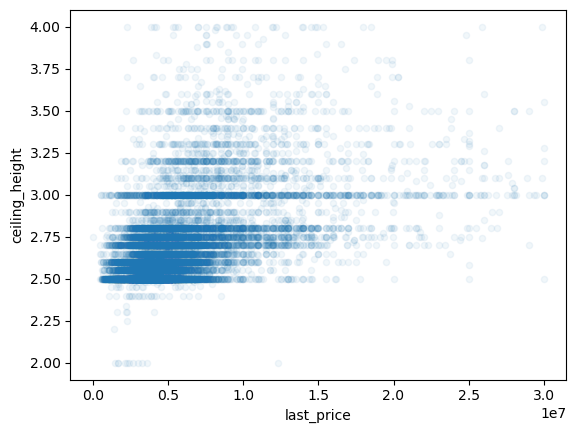

In [64]:
data.plot(x = 'last_price', y = 'ceiling_height', kind='scatter', alpha=0.06)

##### тип этажа квартиры («первый», «последний», «другой»);

<Axes: xlabel='floor_type'>

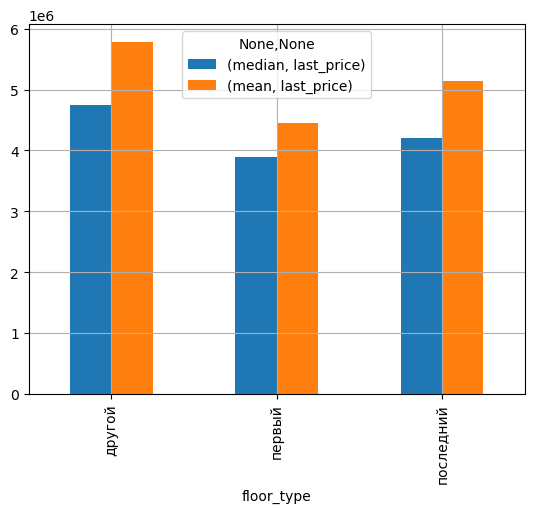

In [65]:
(data
    .pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['median' , 'mean'] )
    .plot.bar(grid=True)
)

Больше всего квартир продалось из категории "Другой", медианная (или средняя) стоимость этих квартир также выше. 

##### общее количество этажей в доме;

Количество этажей в доме особенно ни на что не влияет. Согласно таблице коэф. корреляций Пирсона

##### расстояние до центра города в километрах;

<Axes: xlabel='lenth_to_center'>

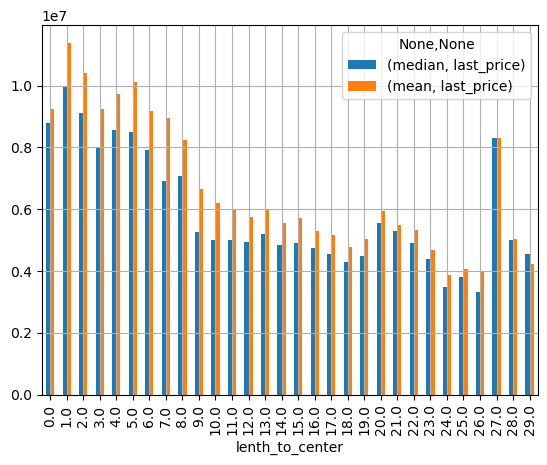

In [66]:
(data[ data['locality_name'] == 'санкт-петербург']
    .pivot_table(index = 'lenth_to_center', values = 'last_price', aggfunc = ['median', 'mean'])
    .plot.bar(grid=True)
)

Из общей таблицы коэффициентов Пирсона, что при удалении от центра стоимость квартиры падает, это сформированно по всем городам.  

Выделили отдельный город, например, СПБ, и проанализировали стоимость квартиры по удалению от центра, тоже снижается (идентичная история с стоимостью квадратного метра на рынке).  

##### расстояние до ближайшего парка.

Количество парков не влияет на базовые параметры. Это может влиять на стоимость квартиры, но неявно (коэф. Пирсона =0.3)

#### Изучите, как быстро продавались квартиры

Изучим показатель days_exposition. выберем датафрейм с самыми быстрыми продажами, рассмотрим его.

In [67]:
data['days_exposition'].describe()

count    20026.000000
mean       177.918556
std        216.590975
min          1.000000
25%         44.000000
50%         94.000000
75%        227.000000
max       1580.000000
Name: days_exposition, dtype: float64

array([[<Axes: title={'center': 'days_exposition'}>]], dtype=object)

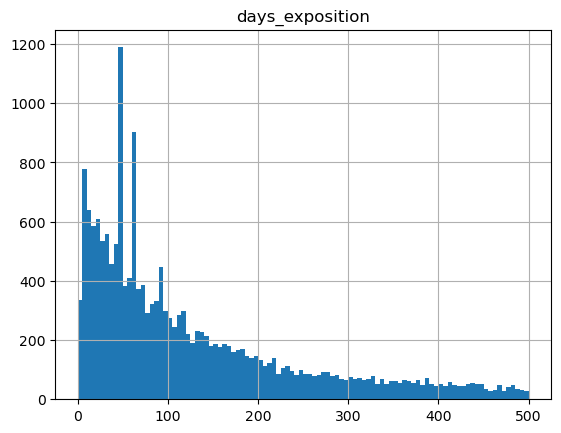

In [68]:
data.hist('days_exposition', bins = 100, range = (0,500))

<Axes: xlabel='weekday'>

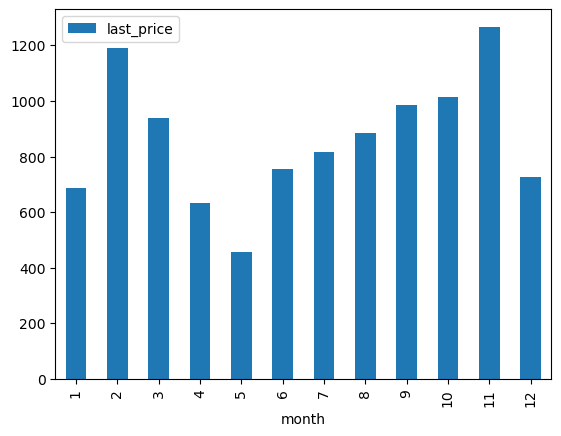

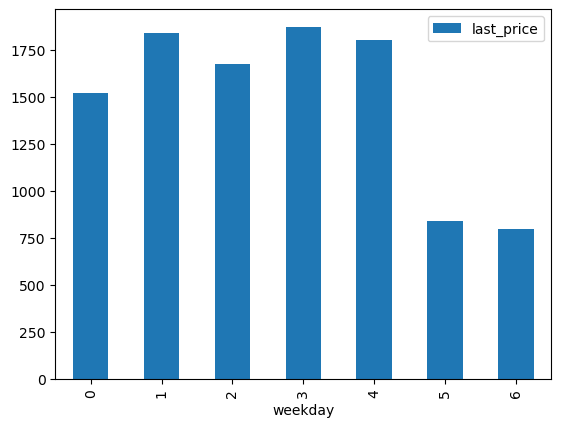

In [69]:
(data [data['days_exposition'] <100]
    .pivot_table (index = 'month', values = 'last_price', aggfunc = 'count')
    .plot(kind = 'bar')
)

(data [data['days_exposition'] <100]
    .pivot_table (index = 'weekday', values = 'last_price', aggfunc = 'count')
    .plot(kind = 'bar')
)

Видно, что большая часть квартир продается за год объявления, согласно описанию в среднем необходимо 170 дней на продажу квартиры, а медиана = 100.

Предлагаю считать, что быстрой продажей квартиры можно считать данные меньше первого квартиля, т.е. <44 дней. Необычно долгой продажей можно считать даты более 227 дней( т.е. третий квартиль). 

Большая часть квартир которые были проданы менее чем за 100 дней были выложенны в ноябре, или феврале (т.е. есть сезонность) 

#### Определите факторы, которые больше всего влияют на общую (полную) стоимость объекта

- общая площадь;
- жилая площадь;
- площадь кухни;
- количество комнат;
- тип этажа, на котором расположена квартира (первый, последний, другой);
- дата размещения (день недели, месяц, год).

**Оценим общую площадь**

0.7582974805808087

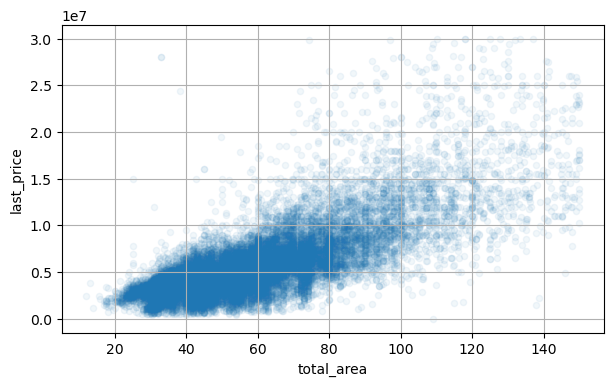

In [70]:
data.sort_values(by = 'total_area').plot(x = 'total_area', y = 'last_price', figsize = (7,4), kind='scatter', alpha=0.06, grid = True)
data['total_area'].corr(data['last_price'])

Основной вывод следующий, с увеличением общей площади финальная цена  увеличивается

**оценим жилую площадь**

0.6104387105374182

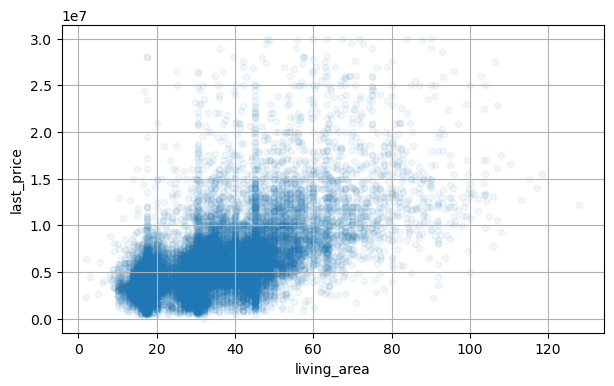

In [71]:
data.sort_values(by = 'living_area').plot(x = 'living_area', y = 'last_price', figsize = (7,4), kind='scatter', alpha=0.06, grid = True)
data['living_area'].corr(data['last_price'])

Основной вывод следующий, с увеличением жилой площади финальная цена  увеличивается

**оценим кухонную площадь**

0.4245162168615766

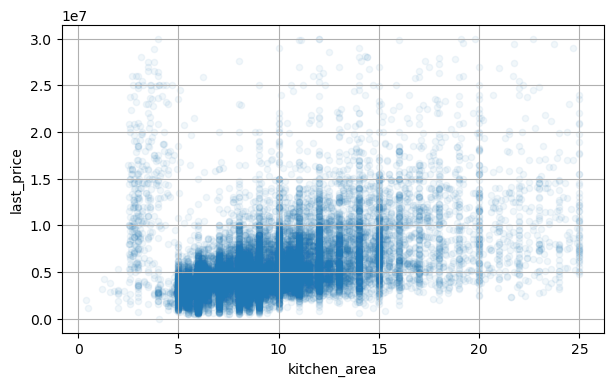

In [72]:
data.sort_values(by = 'kitchen_area').plot(x = 'kitchen_area', y = 'last_price', figsize = (7,4), kind='scatter', alpha=0.06, grid = True)
data['kitchen_area'].corr(data['last_price'])

Основной вывод следующий, с увеличением  площади кухни финальная цена  увеличивается

**оценим влияние комнат**

0.45931330926200103

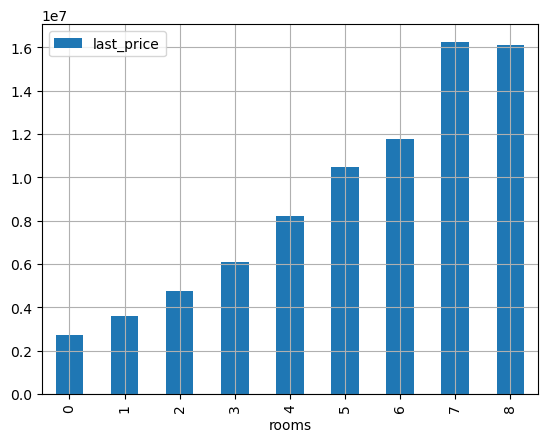

In [73]:
(data
    .pivot_table (index = 'rooms' , values = 'last_price', aggfunc = 'median')
    .plot.bar(grid=True)
)

data['rooms'].corr(data['last_price'])

С увеличением числа комнат в квартире, ее стоимость тоже растет.

**оценим влияние этажности**

<Axes: xlabel='floor_type'>

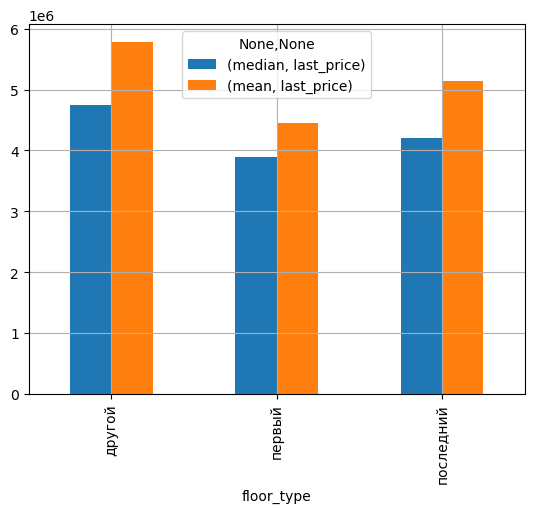

In [74]:
(data
    .pivot_table(index = 'floor_type', values = 'last_price', aggfunc = ['median' , 'mean'] )
    .plot.bar(grid=True)
)

Большей стоимостью обладают группы относящиеся к категории другие, после идут на последнем этаже и минимальная стоимость на первом. 

**оценим время появления объявления**

<Axes: xlabel='weekday'>

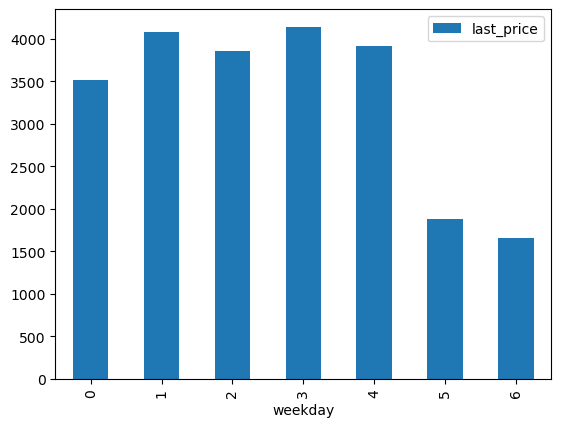

In [75]:
(data
    .pivot_table (index = 'weekday' , values = 'last_price', aggfunc = 'count')
    .plot (kind = 'bar')
)

<Axes: xlabel='month'>

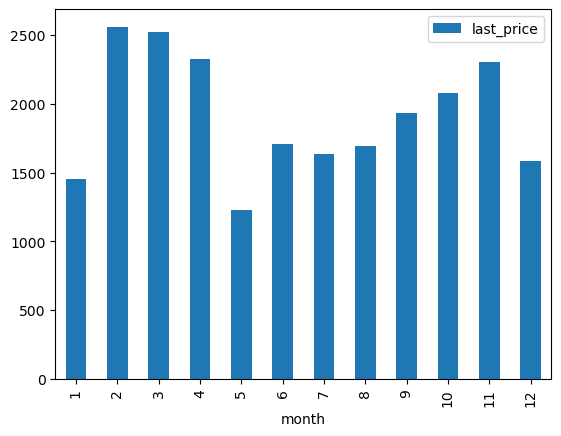

In [76]:
(data
    .pivot_table (index = 'month' , values = 'last_price', aggfunc = 'count')
    .plot (kind = 'bar')
)

<Axes: xlabel='year'>

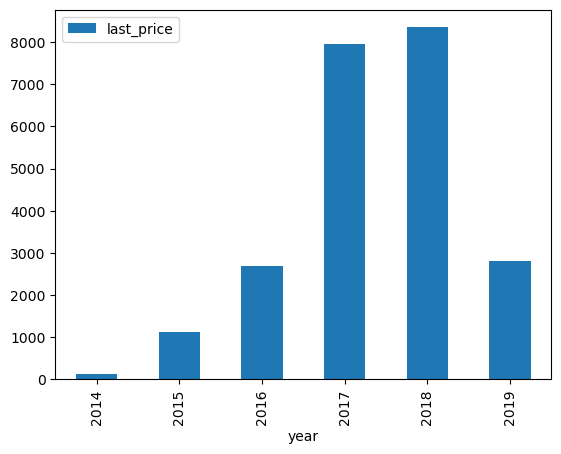

In [77]:
(data
    .pivot_table (index = 'year' , values = 'last_price', aggfunc = 'count')
    .plot (kind = 'bar')
)

Больше всего объявлений выложенно в будние дни, на выходных количество объявлений сокращается.

По месяцам тоже наблюдается сезонная активность перед летом, и перед новым годом, перед новом годом больше (смотри пункт 4.2), т.е. скорее всего люди продают квартиры перед новым годом и в новом году делают покупки, в мае связанно с началом летнего сезона, окончанием учбеных школьных годов, время для съезжа детей, т.е. много факторов могут влиять, но факт того что в мае больше выкладывается объявлений.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

count           mean      median
locality_name                                    
санкт-петербург  15094  110578.644161  104166.670
мурино             590   86087.512017   86175.640
кудрово            472   95324.930508   95675.475
шушары             440   78677.364318   76876.175
всеволожск         397   68703.119723   65789.470
пушкин             359  102866.519694   99744.250
колпино            337   75333.295816   74722.220
парголово          326   90332.262638   91780.225
гатчина            307   68746.146515   67796.610
выборг             235   58075.893915   58158.320

<Axes: xlabel='locality_name'>

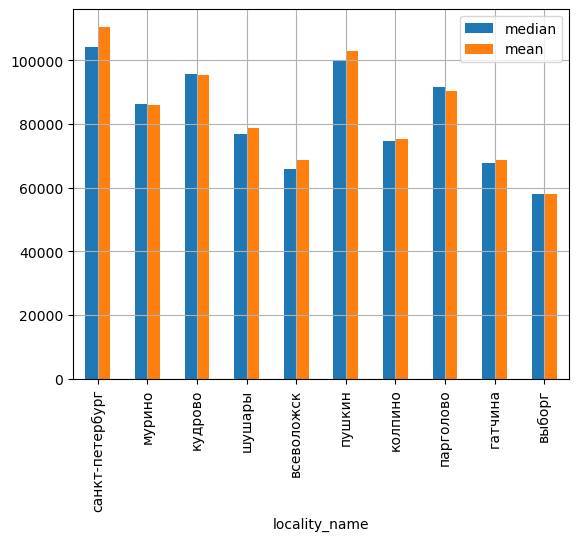

In [78]:
display(data
    .pivot_table (index = 'locality_name', values = 'meter_price', aggfunc = {'median', 'mean' ,'count'})
    .sort_values (by = ('count'), ascending = False)
    .head(10)
)
(data
    .pivot_table (index = 'locality_name', values = 'meter_price', aggfunc = {'median', 'mean' ,'count'})
    .sort_values (by = ('count'), ascending = False)
    .head(10)
    .plot (y= ['median', 'mean'], kind = 'bar', grid = True)
)

Из данного анализа показано, что с уменьшением кол-ва объеявлений потенциально цена как медианная так и средняя уменьшается.

### Напишите общий вывод

***В результате выполнения проекта было сделано следующее:***
1. обработанны все данные, а именно, где необходимо изменен тип данных (например, преобразованна дата публикации информации), удалены аномалии (например, цена снятия объявления), преобразованны данные и получены новые данные (например, как цена за квадратный метр). 
2. На основе этих данных был полученн *следующий результат, что*: 
- цена квартиры с увеличением жилищных квадратных метров (общих, жилых, кухонных) тоже увеличивается
- цена квартиры с увеличением числа комнат увеличивается
- цена квартиры с увеличением высоты потолков увеличивается
- цена зависит от региона в котором продается квартиры, например в СПБ средняя стоимость квадратного метра 100к, а в выборге 60к. 
- цена зависит этажа, например, самый дешевый считается первый этаж, после него идет последний, ну а самые дорогие квартиры находятся между первым и последним. 
- цена зависит от расстояния до центра города, с отдалением, цена на квартиру падает, пример в пункте 4.6.1 город СПБ
- цена не зависит от высоты многоэтажки.

Больше всего объявлений выкладывается в будние дни, лучшим месяцем для продажи является ноябрь и февраль, т.к. именно в эти месяцы больше всего было сделано объявлений о продаже квартиры, длительность которых было <100 дней. 

Согласно полученным коэффициентам корреляции Пирсона, наибольшее влияние в стоимость квартиры будет вносить общая площадь. Но так же согласно из исследования регион в котором он находится (самый дорогой СПБ). 

